# Title of notebook

Brief 1-2 sentence description of notebook.

In [1]:
import random

In [2]:
# Imports of all used packages and libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from collections import OrderedDict
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [4]:
from sklearn.metrics import confusion_matrix

In [5]:
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

# importing random forest classifier from assemble module 
from sklearn.ensemble import RandomForestClassifier 


In [7]:
from sklearn.pipeline import Pipeline

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [9]:
from sklearn.decomposition import PCA



In [10]:
from sklearn.decomposition import FastICA
import numpy as np

from sklearn.decomposition import PCA

In [11]:
from sklearn.preprocessing import StandardScaler


In [12]:
def get_significance_stars_from_p_value(p_value, number_of_comparisons=3):
    """
    """
    if p_value <= 0.001 / number_of_comparisons:
        return "***"
    elif p_value <= 0.01 / number_of_comparisons:
        return "***"
    elif p_value <= 0.05 / number_of_comparisons:
        return "*"
    else:
        return ""

## Inputs & Data

Explanation of each input and where it comes from.

In [13]:
# Inputs and Required data loading
# input varaible names are in all caps snake case
# Whenever an input changes or is used for processing 
# the vairables are all lower in snake case
OUTPUT_DIR = r"./proc" # where data is saved should always be shown in the inputs

In [14]:
font = {'weight' : 'medium',
        'size'   : 20}

matplotlib.rc('font', **font)

In [15]:
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

In [16]:
BAND_TO_COLOR = {"theta": "#FFAF00", "beta": "blue", "gamma": "#15616F"}
["#FFAF00", "#15616F"]

['#FFAF00', '#15616F']

In [17]:
OUTCOME_TO_COLOR = {'lose': "#951a1d",
 'omission': "#af780d",
 'rewarded': "#0499af",
 'win': "#3853a3",
'lose_comp': "#951a1d",
 'win_comp': "#3853a3",
'lose_non_comp': "#e67073",
 'win_non_comp': "#93a5da"}

In [18]:
MEASURE_TO_PATTERN = {"granger": "o", "coherence": "x", "power": ""}

In [19]:
GROUPING = "trial_outcome"
# GROUPING = "competition_closeness"

In [20]:
OUTCOME_LABELS = ["win", "lose", "rewarded"]
# OUTCOME_LABELS = ['win_non_comp', 'lose_non_comp', 'lose_comp', 'win_comp', 'rewarded']
# OUTCOME_LABELS = ['win_non_comp', 'lose_non_comp', 'lose_comp', 'win_comp']

# OUTCOME_LABELS = ['lose_non_comp', 'win_comp']

In [21]:
granger_df = pd.read_pickle("./proc/per_trial_granger.pkl")

In [22]:
power_df = pd.read_pickle("./proc/rce_sleap_and_power.pkl")

In [23]:
coherence_df = pd.read_pickle("./proc/rce_sleap_and_coherence.pkl")

In [24]:
granger_df.shape

(278, 126)

In [25]:
coherence_df.shape

(275, 128)

In [26]:
power_df.shape

(278, 161)

In [27]:
ALL_BANDS = ["theta", "beta", "gamma"]
BAND_TO_FREQ = {"theta": {"low_freq": 6, "high_freq": 11}, "beta": {"low_freq": 20, "high_freq": 31}, "gamma": {"low_freq": 30, "high_freq": 51}}
BAND_TO_FREQ = {"theta": (6,11), "beta": (20,31), "gamma": (30,51)}


In [28]:
merge_columns = ["time", "recording_file", "current_subject", "video_number"]
# Find columns in df2 that are not in merge_columns and also exist in df1, then drop them from df2
cols_to_drop = [col for col in power_df.columns if col not in merge_columns and col in coherence_df.columns]
coherence_df = coherence_df.drop(columns=cols_to_drop)
cols_to_drop = [col for col in power_df.columns if col not in merge_columns and col in granger_df.columns]
granger_df = granger_df.drop(columns=cols_to_drop)


In [29]:
power_df.columns

Index(['time', 'recording_file', 'video_number', 'current_subject',
       'mPFC_baseline_lfp_trace', 'mPFC_trial_lfp_trace',
       'mPFC_baseline-trial_lfp_trace', 'vHPC_baseline_lfp_trace',
       'vHPC_trial_lfp_trace', 'vHPC_baseline-trial_lfp_trace',
       ...
       'mPFC_baseline_power_window-averaged-velocity-parsed',
       'vHPC_baseline_power_window-averaged-velocity-parsed',
       'BLA_baseline_power_window-averaged-velocity-parsed',
       'LH_baseline_power_window-averaged-velocity-parsed',
       'MD_baseline_power_window-averaged-velocity-parsed',
       'mPFC_trial_power_window-averaged-velocity-parsed',
       'vHPC_trial_power_window-averaged-velocity-parsed',
       'BLA_trial_power_window-averaged-velocity-parsed',
       'LH_trial_power_window-averaged-velocity-parsed',
       'MD_trial_power_window-averaged-velocity-parsed'],
      dtype='object', length=161)

In [30]:
power_col = [col for col in power_df.columns if "power_window-averaged-velocity-parsed" in col]

In [31]:
power_df = power_df.dropna(subset=power_col).reset_index(drop=True)

In [32]:
for col in power_col:
    region_1 = col.split("_")[0]
    
    for band, (low_freq, high_freq) in BAND_TO_FREQ.items():
        region_band_column = "{}_{}_band_power".format(region_1, band)
        power_df[region_band_column] = power_df[col].apply(lambda x: np.mean(x[low_freq: high_freq]))

In [33]:
granger_col = [col for col in granger_df.columns if "window_mean_granger" in col]

In [34]:
BAND_TO_FREQ

{'theta': (6, 11), 'beta': (20, 31), 'gamma': (30, 51)}

In [35]:
for col in granger_col:
    region_1 = col.split("_")[0]
    region_2 = col.split("_")[1]
    
    for band, (low_freq, high_freq) in BAND_TO_FREQ.items():
        region_band_column = "{}_{}_{}_band_granger".format(region_1, region_2, band)
        granger_df[region_band_column] = granger_df[col].apply(lambda x: np.mean(x[low_freq: high_freq]))

/tmp/ipykernel_2208797/202851467.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  granger_df[region_band_column] = granger_df[col].apply(lambda x: np.mean(x[low_freq: high_freq]))
/tmp/ipykernel_2208797/202851467.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  granger_df[region_band_column] = granger_df[col].apply(lambda x: np.mean(x[low_freq: high_freq]))
/tmp/ipykernel_2208797/202851467.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has p

In [36]:
MERGED_LFP_AND_SLEAP = pd.merge(left=power_df, right=coherence_df, on=merge_columns, how="inner")

In [37]:
MERGED_LFP_AND_SLEAP = pd.merge(left=MERGED_LFP_AND_SLEAP, right=granger_df, on=merge_columns, how="inner")

In [38]:
MERGED_LFP_AND_SLEAP

time                                     recording_file  \
0    30950500  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
1    32550496  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
2    34350494  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
3    35950496  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
4    37450494  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
..        ...                                                ...   
265  65281838  20230621_111240_standard_comp_to_omission_D5_s...   
266  66781856  20230621_111240_standard_comp_to_omission_D5_s...   
267  68781880  20230621_111240_standard_comp_to_omission_D5_s...   
268  70681909  20230621_111240_standard_comp_to_omission_D5_s...   
269  71681918  20230621_111240_standard_comp_to_omission_D5_s...   

     video_number current_subject  \
0             1.0             6.1   
1             1.0             6.1   
2             1.0             6.1   
3             1.0             6.1   
4             1.0             6.1   
..            ...             ...   
265           1.0             1.4   
266           1.0             1.4   
267           1.0             1.4   
268           1.0             1.4   
269           1.0             1.4   

                               mPFC_baseline_lfp_trace  \
0    [-0.3134648, -0.39993784, -0.8777014, -1.44193...   
1    [1.1176641, 1.0657803, 0.9987637, 0.8128466, 0...   
2    [-0.22482991, 0.3567013, 0.12538591, -0.136195...   
3    [0.4864109, 0.18591705, 0.397776, 0.24212453, ...   
4    [-3.6210587, -2.9530544, -2.4342163, -2.574735...   
..                                                 ...   
265  [0.25026315, -0.0152599495, 0.03967587, 0.0122...   
266  [0.42422658, 0.38760272, 0.28383505, 0.0427278...   
267  [0.64702183, 0.027467908, -0.6317619, -1.02852...   
268  [-2.685751, -3.0641978, -4.092718, -4.0042105,...   
269  [-0.64091784, -0.17091143, 0.42727858, 0.37539...   

                                  mPFC_trial_lfp_trace  \
0    [0.50154364, 0.29617018, 0.22050627, 0.1145767...   
1    [0.31995025, 0.16429879, 0.010809131, 0.067016...   
2    [-0.13835686, 0.42804158, 0.5945022, 0.3134648...   
3    [-0.32211208, 0.023780087, 0.13835686, -0.1102...   
4    [-2.9508927, -2.998453, -2.3282866, -2.0104983...   
..                                                 ...   
265  [-2.2889924, -2.2004848, -1.4741111, -1.010208...   
266  [-2.426332, -2.2187965, -1.6297625, -1.0193646...   
267  [-1.815934, -1.4191753, -1.1017684, -0.4028626...   
268  [0.042727858, 0.22279526, 0.2655231, -0.326562...   
269  [-0.054935817, 0.5096823, 0.9369609, 1.0346246...   

                         mPFC_baseline-trial_lfp_trace  \
0    [-0.3134648, -0.39993784, -0.8777014, -1.44193...   
1    [1.1176641, 1.0657803, 0.9987637, 0.8128466, 0...   
2    [-0.22482991, 0.3567013, 0.12538591, -0.136195...   
3    [0.4864109, 0.18591705, 0.397776, 0.24212453, ...   
4    [-3.6210587, -2.9530544, -2.4342163, -2.574735...   
..                                                 ...   
265  [0.25026315, -0.0152599495, 0.03967587, 0.0122...   
266  [0.42422658, 0.38760272, 0.28383505, 0.0427278...   
267  [0.64702183, 0.027467908, -0.6317619, -1.02852...   
268  [-2.685751, -3.0641978, -4.092718, -4.0042105,...   
269  [-0.64091784, -0.17091143, 0.42727858, 0.37539...   

                               vHPC_baseline_lfp_trace  \
0    [0.2583401, -0.26769176, -0.8311303, -1.046219...   
1    [1.8691666, 2.0795794, 2.2408957, 2.3461022, 2...   
2    [-1.0017985, -0.70955855, -0.7002069, -0.68033...   
3    [0.58447987, 0.4675839, 0.21275067, 0.03389983...   
4    [-1.4191171, -1.3793725, -1.1233703, -0.911788...   
..                                                 ...   
265  [-0.54008055, -0.7600229, -0.74047244, -0.6133...   
266  [-0.82844937, -0.7673543, -0.7062592, -0.71359...   
267  [-0.4374408, -0.3470201, -0.22971752, -0.22238...   
268  [0.75024766, 0.7820171, 0.73802865, 1.0141784,...   
269  [0.4276656, 0

In [39]:
MERGED_LFP_AND_SLEAP["recording_file"].unique()

array(['20221214_125409_om_and_comp_6_1_top_1_base_2_vs_6_3',
       '20221215_145401_comp_amd_om_6_1_top_4_base_3',
       '20230617_115521_standard_comp_to_omission_D1_subj_1-1_t1b3L_box1_merged',
       '20230617_115521_standard_comp_to_omission_D1_subj_1-2_t2b2L_box2_merged',
       '20230618_100636_standard_comp_to_omission_D2_subj_1_1_t1b2L_box2_merged',
       '20230618_100636_standard_comp_to_omission_D2_subj_1_4_t4b3L_box1_merged',
       '20230619_115321_standard_comp_to_omission_D3_subj_1-4_t3b3L_box2_merged',
       '20230620_114347_standard_comp_to_omission_D4_subj_1-1_t1b2L_box_2_merged',
       '20230620_114347_standard_comp_to_omission_D4_subj_1-2_t3b3L_box_1_merged',
       '20230621_111240_standard_comp_to_omission_D5_subj_1-4_t3b3L_box1_merged'],
      dtype=object)

In [40]:
MERGED_LFP_AND_SLEAP.groupby(["time", "trial_outcome", "current_subject"]).count()

recording_file  video_number  \
time     trial_outcome current_subject                                 
1934930  lose          1.1                           1             1   
         win           1.4                           1             1   
4334936  lose          1.4                           1             1   
         win           1.1                           1             1   
4509412  lose          1.1                           1             1   
...                                                ...           ...   
68781880 rewarded      1.4                           1             1   
69560954 rewarded      1.1                           1             1   
                       1.2                           1             1   
70681909 omission      1.4                           1             1   
71681918 rewarded      1.4                           1             1   

                                        mPFC_baseline_lfp_trace  \
time     trial_outcome current_subject                            
1934930  lose          1.1                                    1   
         win           1.4                                    1   
4334936  lose          1.4                                    1   
         win           1.1                                    1   
4509412  lose          1.1                                    1   
...                                                         ...   
68781880 rewarded      1.4                                    1   
69560954 rewarded      1.1                                    1   
                       1.2                                    1   
70681909 omission      1.4                                    1   
71681918 rewarded      1.4                                    1   

                                        mPFC_trial_lfp_trace  \
time     trial_outcome current_subject                         
1934930  lose          1.1                                 1   
         win           1.4                                 1   
4334936  lose          1.4                                 1   
         win           1.1                                 1   
4509412  lose          1.1                                 1   
...                                                      ...   
68781880 rewarded      1.4                                 1   
69560954 rewarded      1.1                                 1   
                       1.2                                 1   
70681909 omission      1.4                                 1   
71681918 rewarded      1.4                                 1   

                                        mPFC_baseline-trial_lfp_trace  \
time     trial_outcome current_subject                                  
1934930  lose          1.1                                          1   
         win           1.4                                          1   
4334936  lose          1.4                                          1   
         win           1.1                                          1   
4509412  lose          1.1                                          1   
...                                                               ...   
68781880 rewarded      1.4                                          1   
69560954 rewarded      1.1                                          1   
                       1.2                                          1   
70681909 omission      1.4                                          1   
71681918 rewarded      1.4                                          1   

                                        vHPC_baseline_lfp_trace  \
time     trial_outcome current_subject                            
1934930  lose          1.1                                    1   
         win           1.4                                    1   
4334936  lose          1.4                                    1   
         win           1.1                                    1   
4509412  lose          1.1                    

In [41]:
MERGED_LFP_AND_SLEAP[MERGED_LFP_AND_SLEAP["trial_outcome"] == "lose"].shape

(79, 362)

In [42]:
MERGED_LFP_AND_SLEAP["recording_dir"].unique()

array(['20221214_125409_om_and_comp_6_1_and_6_3',
       '20221215_145401_comp_amd_om_6_1_and_6_3',
       '20230617_115521_standard_comp_to_omission_D1_subj_1-1_and_1-2',
       '20230618_100636_standard_comp_to_omission_D2_subj_1-4_and_1-1',
       '20230619_115321_standard_comp_to_omission_D3_subj_1-2_and_1-4',
       '20230620_114347_standard_comp_to_omission_D4_subj_1-2_and_1-1',
       '20230621_111240_standard_comp_to_omission_D5_subj_1-4_and_1-2'],
      dtype=object)

In [43]:
feature_columns = [col for col in MERGED_LFP_AND_SLEAP if "band" in col and "beta" not in col]

In [44]:
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.dropna(subset=feature_columns)

## Outputs

Describe each output that the notebook creates. 

- Is it a plot or is it data?

- How valuable is the output and why is it valuable or useful?

## Functions 

In [45]:
def get_region_network(row, columns, low_index=0, high_index=1):
    directed_graph = nx.DiGraph()
    for col in columns:
        region_1 = col.split("_")[0]
        region_2 = col.split("_")[1]
        directed_graph.add_edge(region_1, region_2, weight=np.mean(row[col][low_index:high_index]))
    return directed_graph

In [46]:
def generate_pairs(lst):
    pairs = []
    n = len(lst)
    for i in range(n):
        for j in range(i+1, n):
            pairs.append((lst[i], lst[j]))
    return pairs

# Part 1. Making predictions of winning vs losing based on power

## Processing

Describe what is done to the data here and how inputs are manipulated to generate outputs. 

In [47]:
# As much code and as many cells as required
# includes EDA and playing with data
# GO HAM!

# Ideally functions are defined here first and then data is processed using the functions

# function names are short and in snake case all lowercase
# a function name should be unique but does not have to describe the function
# doc strings describe functions not function names




In [48]:
ALL_BANDS = ["theta", "beta", "gamma"]
# BAND_TO_FREQ = {"theta": {"low_freq": 4, "high_freq": 12}, "beta": {"low_freq": 13, "high_freq": 30}, "gamma": {"low_freq": 30, "high_freq": 70}}
# BAND_TO_FREQ = {"theta": {"low_freq": 6, "high_freq": 11}, "gamma": {"low_freq": 30, "high_freq": 51}}
BAND_TO_FREQ = {"theta": (6, 11), "gamma": (30, 51)}

- Filtering for powers that are from low velocity parts of the trial

In [49]:
MERGED_LFP_AND_SLEAP.head()

time                                     recording_file  video_number  \
0  30950500  20221214_125409_om_and_comp_6_1_top_1_base_2_v...           1.0   
1  32550496  20221214_125409_om_and_comp_6_1_top_1_base_2_v...           1.0   
2  34350494  20221214_125409_om_and_comp_6_1_top_1_base_2_v...           1.0   
3  35950496  20221214_125409_om_and_comp_6_1_top_1_base_2_v...           1.0   
4  37450494  20221214_125409_om_and_comp_6_1_top_1_base_2_v...           1.0   

  current_subject                            mPFC_baseline_lfp_trace  \
0             6.1  [-0.3134648, -0.39993784, -0.8777014, -1.44193...   
1             6.1  [1.1176641, 1.0657803, 0.9987637, 0.8128466, 0...   
2             6.1  [-0.22482991, 0.3567013, 0.12538591, -0.136195...   
3             6.1  [0.4864109, 0.18591705, 0.397776, 0.24212453, ...   
4             6.1  [-3.6210587, -2.9530544, -2.4342163, -2.574735...   

                                mPFC_trial_lfp_trace  \
0  [0.50154364, 0.29617018, 0.22050627, 0.1145767...   
1  [0.31995025, 0.16429879, 0.010809131, 0.067016...   
2  [-0.13835686, 0.42804158, 0.5945022, 0.3134648...   
3  [-0.32211208, 0.023780087, 0.13835686, -0.1102...   
4  [-2.9508927, -2.998453, -2.3282866, -2.0104983...   

                       mPFC_baseline-trial_lfp_trace  \
0  [-0.3134648, -0.39993784, -0.8777014, -1.44193...   
1  [1.1176641, 1.0657803, 0.9987637, 0.8128466, 0...   
2  [-0.22482991, 0.3567013, 0.12538591, -0.136195...   
3  [0.4864109, 0.18591705, 0.397776, 0.24212453, ...   
4  [-3.6210587, -2.9530544, -2.4342163, -2.574735...   

                             vHPC_baseline_lfp_trace  \
0  [0.2583401, -0.26769176, -0.8311303, -1.046219...   
1  [1.8691666, 2.0795794, 2.2408957, 2.3461022, 2...   
2  [-1.0017985, -0.70955855, -0.7002069, -0.68033...   
3  [0.58447987, 0.4675839, 0.21275067, 0.03389983...   
4  [-1.4191171, -1.3793725, -1.1233703, -0.911788...   

                                vHPC_trial_lfp_trace  \
0  [-1.1479185, -1.1806493, -1.1432426, -1.139735...   
1  [-1.0205019, -0.9152954, -0.9947847, -0.976081...   
2  [0.47109076, 0.34016728, 0.18352668, 0.174175,...   
3  [0.15780956, 0.047927346, -0.14728892, -0.3565...   
4  [-4.0457697, -4.2304654, -3.9113393, -3.448431...   

                       vHPC_baseline-trial_lfp_trace  ...  \
0  [0.2583401, -0.26769176, -0.8311303, -1.046219...  ...   
1  [1.8691666, 2.0795794, 2.2408957, 2.3461022, 2...  ...   
2  [-1.0017985, -0.70955855, -0.7002069, -0.68033...  ...   
3  [0.58447987, 0.4675839, 0.21275067, 0.03389983...  ...   
4  [-1.4191171, -1.3793725, -1.1233703, -0.911788...  ...   

  MD_vHPC_gamma_band_granger vHPC_MD_theta_band_granger  \
0                   0.308700                   0.544461   
1                   0.296993                   0.424742   
2                   0.264659                   0.416857   
3                   0.336984                   0.406630   
4                   0.269036                   0.535375   

  vHPC_MD_beta_band_granger vHPC_MD_gamma_band_granger  \
0                  0.315053                   0.392972   
1                  0.464322                   0.484576   
2                  0.538528                   0.528551   
3                  0.523946                   0.504038   
4                  0.556873                   0.593945   

  mPFC_vHPC_theta_band_granger mPFC_vHPC_beta_band_granger  \
0                     0.241112                    0.322984   
1                     0.337904                    0.300037   
2                     0.379768                    0.296710   
3                     0.235804                    0.441383   
4                     0.419996                    0.330796   

  mPFC_vHPC_gamma_band_granger vHPC_mPFC_theta_band_granger  \
0                     0.305378                     0.488346   
1                     0.328714                     0.486609   
2                     0.271932                     0.515236   
3                     0.310826                   

In [50]:
for col in MERGED_LFP_AND_SLEAP.columns:
    print(col)

time
recording_file
video_number
current_subject
mPFC_baseline_lfp_trace
mPFC_trial_lfp_trace
mPFC_baseline-trial_lfp_trace
vHPC_baseline_lfp_trace
vHPC_trial_lfp_trace
vHPC_baseline-trial_lfp_trace
BLA_baseline_lfp_trace
BLA_trial_lfp_trace
BLA_baseline-trial_lfp_trace
LH_baseline_lfp_trace
LH_trial_lfp_trace
LH_baseline-trial_lfp_trace
MD_baseline_lfp_trace
MD_trial_lfp_trace
MD_baseline-trial_lfp_trace
recording_dir
time_stamp_index
video_file
video_frame
subject_info
competition_closeness
video_name
all_subjects
trial_outcome
lfp_index
baseline_lfp_timestamp_range
trial_lfp_timestamp_range
baseline_ephys_timestamp_range
trial_ephys_timestamp_range
baseline_videoframe_range
trial_videoframe_range
trial_number
Cohort
spike_interface_mPFC
spike_interface_vHPC
spike_interface_BLA
spike_interface_LH
spike_interface_MD
file_path
start_frame
stop_frame
individual_subj
all_subj
recording_name
track_names
subject_and_tracks_list
subject_id
agent_id
corner_path
corner_parts
bottom_width
top_

In [51]:
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.drop(columns=[col for col in MERGED_LFP_AND_SLEAP.columns if "trace" in col], errors="ignore")
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.drop(columns=[col for col in MERGED_LFP_AND_SLEAP.columns if "frequencies" in col], errors="ignore")
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.drop(columns=[col for col in MERGED_LFP_AND_SLEAP.columns if "window" in col], errors="ignore")
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.drop(columns=[col for col in MERGED_LFP_AND_SLEAP.columns if "velocity" in col], errors="ignore")
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.drop(columns=[col for col in MERGED_LFP_AND_SLEAP.columns if "locations" in col], errors="ignore")
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.drop(columns=[col for col in MERGED_LFP_AND_SLEAP.columns if "trial" in col and "trial_outcome" != col], errors="ignore")
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.drop(columns=[col for col in MERGED_LFP_AND_SLEAP.columns if "baseline" in col], errors="ignore")



In [52]:
MERGED_LFP_AND_SLEAP.to_pickle("./proc/rce_sleap_and_spectral.pkl")

In [53]:
MERGED_LFP_AND_SLEAP

time                                     recording_file  \
0    30950500  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
1    32550496  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
2    34350494  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
3    35950496  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
4    37450494  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
..        ...                                                ...   
265  65281838  20230621_111240_standard_comp_to_omission_D5_s...   
266  66781856  20230621_111240_standard_comp_to_omission_D5_s...   
267  68781880  20230621_111240_standard_comp_to_omission_D5_s...   
268  70681909  20230621_111240_standard_comp_to_omission_D5_s...   
269  71681918  20230621_111240_standard_comp_to_omission_D5_s...   

     video_number current_subject  \
0             1.0             6.1   
1             1.0             6.1   
2             1.0             6.1   
3             1.0             6.1   
4             1.0             6.1   
..            ...             ...   
265           1.0             1.4   
266           1.0             1.4   
267           1.0             1.4   
268           1.0             1.4   
269           1.0             1.4   

                                         recording_dir  time_stamp_index  \
0              20221214_125409_om_and_comp_6_1_and_6_3          27998597   
1              20221214_125409_om_and_comp_6_1_and_6_3          29598593   
2              20221214_125409_om_and_comp_6_1_and_6_3          31398591   
3              20221214_125409_om_and_comp_6_1_and_6_3          32998593   
4              20221214_125409_om_and_comp_6_1_and_6_3          34498591   
..                                                 ...               ...   
265  20230621_111240_standard_comp_to_omission_D5_s...          62088794   
266  20230621_111240_standard_comp_to_omission_D5_s...          63588812   
267  20230621_111240_standard_comp_to_omission_D5_s...          65588836   
268  20230621_111240_standard_comp_to_omission_D5_s...          67488865   
269  20230621_111240_standard_comp_to_omission_D5_s...          68488874   

                                            video_file  video_frame  \
0    20221214_125409_om_and_comp_6_1_and_6_3.1.vide...        28574   
1    20221214_125409_om_and_comp_6_1_and_6_3.1.vide...        30569   
2    20221214_125409_om_and_comp_6_1_and_6_3.1.vide...        32813   
3    20221214_125409_om_and_comp_6_1_and_6_3.1.vide...        34807   
4    20221214_125409_om_and_comp_6_1_and_6_3.1.vide...        36677   
..                                                 ...          ...   
265  20230621_111240_standard_comp_to_omission_D5_s...        62056   
266  20230621_111240_standard_comp_to_omission_D5_s...        63554   
267  20230621_111240_standard_comp_to_omission_D5_s...        65550   
268  20230621_111240_standard_comp_to_omission_D5_s...        67447   
269  20230621_111240_standard_comp_to_omission_D5_s...        68444   

                subject_info competition_closeness  ...  \
0    6_1_top_1_base_2_vs_6_3          win_non_comp  ...   
1    6_1_top_1_base_2_vs_6_3          win_non_comp  ...   
2    6_1_top_1_base_2_vs_6_3          win_non_comp  ...   
3    6_1_top_1_base_2_vs_6_3          win_non_comp  ...   
4    6_1_top_1_base_2_vs_6_3          win_non_comp  ...   
..                       ...                   ...  ...   
265           1-4_t3b3L_box1              rewarded  ...   
266           1-4_t3b3L_box1              rewarded  ...   
267           1-4_t3b3L_box1              rewarded  ...   
268           1-4_t3b3L_box1              omission  ...   
269           1-4_t3b3L_box1              rewarded  ...   

    MD_vHPC_gamma_band_granger vHPC_MD_theta_band_granger  \
0                     0.308700                   0.544461   
1                     0.296993                   0.424742   
2                     0.264659                   0.416857   
3                     0.3369

- Filtering out for trials that are win vs loss

In [54]:
network_df = MERGED_LFP_AND_SLEAP[MERGED_LFP_AND_SLEAP[GROUPING].isin(OUTCOME_LABELS)]

# network_df = MERGED_LFP_AND_SLEAP[MERGED_LFP_AND_SLEAP[GROUPING].isin(OUTCOME_LABELS)]
# network_df = network_df[network_df["current_subject"].isin(["1.1"])]


In [55]:
network_df[feature_columns + ["trial_outcome", "current_subject"]].groupby(["trial_outcome", "current_subject"]).mean()

mPFC_theta_band_power  mPFC_gamma_band_power  \
trial_outcome current_subject                                                 
lose          1.1                           0.035014               0.002283   
              1.2                           0.033886               0.001419   
              1.4                           0.019663               0.002811   
              6.1                           0.018833               0.001493   
rewarded      1.1                           0.026074               0.001960   
              1.2                           0.016890               0.001050   
              1.4                           0.020093               0.002552   
win           1.1                           0.026591               0.001946   
              1.2                           0.025131               0.001263   
              1.4                           0.017934               0.002898   
              6.1                           0.028384               0.001509   

                               vHPC_theta_band_power  vHPC_gamma_band_power  \
trial_outcome current_subject                                                 
lose          1.1                           0.031110               0.003278   
              1.2                           0.028773               0.001829   
              1.4                           0.040573               0.004787   
              6.1                           0.030889               0.002016   
rewarded      1.1                           0.022192               0.002850   
              1.2                           0.036060               0.001284   
              1.4                           0.019695               0.002922   
win           1.1                           0.019165               0.002738   
              1.2                           0.020929               0.001716   
              1.4                           0.052544               0.006452   
              6.1                           0.030815               0.001631   

                               BLA_theta_band_power  BLA_gamma_band_power  \
trial_outcome current_subject                                               
lose          1.1                          0.039351              0.002608   
              1.2                          0.037059              0.002716   
              1.4                          0.020977              0.004621   
              6.1                          0.018324              0.004750   
rewarded      1.1                          0.026964              0.002526   
              1.2                          0.018754              0.002213   
              1.4                          0.014854              0.004043   
win           1.1                          0.027716              0.002404   
              1.2                          0.026998              0.002475   
              1.4                          0.022677              0.005157   
              6.1                          0.017172              0.002924   

                               LH_theta_band_power  LH_gamma_band_power  \
trial_outcome current_subject                                             
lose          1.1                         0.048926             0.001350   
              1.2                         0.049167             0.001946   
              1.4                         0.033234             0.001616   
              6.1                         0.018990             0.001259   
rewarded      1.1                         0.033382             0.001229   
              1.2                         0.022577             0.001339   
              1.4                         0.025866             0.001514   
win           1.1                         0.033760             0.001270   
              1.2                         0.036565             0.001662   
              1.4                         0.025727             0.001802   
              6.1                         0.025198             0.001219  

In [56]:
network_df[feature_columns + ["trial_outcome", "current_subject"]].groupby(["trial_outcome", "current_subject"]).sem()

mPFC_theta_band_power  mPFC_gamma_band_power  \
trial_outcome current_subject                                                 
lose          1.1                           0.003555               0.000086   
              1.2                           0.002849               0.000198   
              1.4                           0.000890               0.000069   
              6.1                           0.001854               0.000063   
rewarded      1.1                           0.001153               0.000045   
              1.2                           0.000665               0.000021   
              1.4                           0.001284               0.000138   
win           1.1                           0.001216               0.000033   
              1.2                           0.003164               0.000044   
              1.4                           0.001027               0.000072   
              6.1                           0.000690               0.000030   

                               vHPC_theta_band_power  vHPC_gamma_band_power  \
trial_outcome current_subject                                                 
lose          1.1                           0.003172               0.000162   
              1.2                           0.001642               0.000086   
              1.4                           0.002743               0.000351   
              6.1                           0.002430               0.000151   
rewarded      1.1                           0.001366               0.000085   
              1.2                           0.001712               0.000046   
              1.4                           0.001502               0.000135   
win           1.1                           0.000875               0.000049   
              1.2                           0.001161               0.000083   
              1.4                           0.008488               0.000802   
              6.1                           0.000873               0.000028   

                               BLA_theta_band_power  BLA_gamma_band_power  \
trial_outcome current_subject                                               
lose          1.1                          0.003445              0.000096   
              1.2                          0.003237              0.000255   
              1.4                          0.000899              0.000152   
              6.1                          0.001654              0.000245   
rewarded      1.1                          0.001417              0.000087   
              1.2                          0.000447              0.000049   
              1.4                          0.000830              0.000163   
win           1.1                          0.001337              0.000044   
              1.2                          0.001653              0.000154   
              1.4                          0.002738              0.000500   
              6.1                          0.000461              0.000154   

                               LH_theta_band_power  LH_gamma_band_power  \
trial_outcome current_subject                                             
lose          1.1                         0.004365             0.000047   
              1.2                         0.005434             0.000403   
              1.4                         0.001467             0.000049   
              6.1                         0.001033             0.000064   
rewarded      1.1                         0.001691             0.000033   
              1.2                         0.000952             0.000037   
              1.4                         0.001384             0.000055   
win           1.1                         0.001406             0.000027   
              1.2                         0.003877             0.000075   
              1.4                         0.002046             0.000105   
              6.1                         0.000952             0.000022  

In [57]:
spectral_features = ["power", "coherence", "granger"]
band_features = ["theta", "gamma"]

In [58]:
sub_feature_to_columns = {}

In [59]:
import itertools

In [60]:
for feature_1, feature_2 in itertools.product(band_features, spectral_features):
    sub_feature_to_columns["{} {} only".format(feature_1, feature_2)] = [col for col in feature_columns if feature_1 in col and feature_2 in col]

In [61]:
sub_feature_to_columns

{'theta power only': ['mPFC_theta_band_power',
  'vHPC_theta_band_power',
  'BLA_theta_band_power',
  'LH_theta_band_power',
  'MD_theta_band_power'],
 'theta coherence only': ['BLA_LH_theta_band_coherence',
  'BLA_MD_theta_band_coherence',
  'BLA_mPFC_theta_band_coherence',
  'BLA_vHPC_theta_band_coherence',
  'LH_MD_theta_band_coherence',
  'LH_mPFC_theta_band_coherence',
  'LH_vHPC_theta_band_coherence',
  'MD_mPFC_theta_band_coherence',
  'MD_vHPC_theta_band_coherence',
  'mPFC_vHPC_theta_band_coherence'],
 'theta granger only': ['BLA_LH_theta_band_granger',
  'LH_BLA_theta_band_granger',
  'BLA_MD_theta_band_granger',
  'MD_BLA_theta_band_granger',
  'BLA_mPFC_theta_band_granger',
  'mPFC_BLA_theta_band_granger',
  'BLA_vHPC_theta_band_granger',
  'vHPC_BLA_theta_band_granger',
  'LH_MD_theta_band_granger',
  'MD_LH_theta_band_granger',
  'LH_mPFC_theta_band_granger',
  'mPFC_LH_theta_band_granger',
  'LH_vHPC_theta_band_granger',
  'vHPC_LH_theta_band_granger',
  'MD_mPFC_theta_b

In [62]:
network_df

time                                     recording_file  \
0    30950500  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
1    32550496  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
2    34350494  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
3    35950496  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
4    37450494  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
..        ...                                                ...   
264  64081824  20230621_111240_standard_comp_to_omission_D5_s...   
265  65281838  20230621_111240_standard_comp_to_omission_D5_s...   
266  66781856  20230621_111240_standard_comp_to_omission_D5_s...   
267  68781880  20230621_111240_standard_comp_to_omission_D5_s...   
269  71681918  20230621_111240_standard_comp_to_omission_D5_s...   

     video_number current_subject  \
0             1.0             6.1   
1             1.0             6.1   
2             1.0             6.1   
3             1.0             6.1   
4             1.0             6.1   
..            ...             ...   
264           1.0             1.4   
265           1.0             1.4   
266           1.0             1.4   
267           1.0             1.4   
269           1.0             1.4   

                                         recording_dir  time_stamp_index  \
0              20221214_125409_om_and_comp_6_1_and_6_3          27998597   
1              20221214_125409_om_and_comp_6_1_and_6_3          29598593   
2              20221214_125409_om_and_comp_6_1_and_6_3          31398591   
3              20221214_125409_om_and_comp_6_1_and_6_3          32998593   
4              20221214_125409_om_and_comp_6_1_and_6_3          34498591   
..                                                 ...               ...   
264  20230621_111240_standard_comp_to_omission_D5_s...          60888780   
265  20230621_111240_standard_comp_to_omission_D5_s...          62088794   
266  20230621_111240_standard_comp_to_omission_D5_s...          63588812   
267  20230621_111240_standard_comp_to_omission_D5_s...          65588836   
269  20230621_111240_standard_comp_to_omission_D5_s...          68488874   

                                            video_file  video_frame  \
0    20221214_125409_om_and_comp_6_1_and_6_3.1.vide...        28574   
1    20221214_125409_om_and_comp_6_1_and_6_3.1.vide...        30569   
2    20221214_125409_om_and_comp_6_1_and_6_3.1.vide...        32813   
3    20221214_125409_om_and_comp_6_1_and_6_3.1.vide...        34807   
4    20221214_125409_om_and_comp_6_1_and_6_3.1.vide...        36677   
..                                                 ...          ...   
264  20230621_111240_standard_comp_to_omission_D5_s...        60859   
265  20230621_111240_standard_comp_to_omission_D5_s...        62056   
266  20230621_111240_standard_comp_to_omission_D5_s...        63554   
267  20230621_111240_standard_comp_to_omission_D5_s...        65550   
269  20230621_111240_standard_comp_to_omission_D5_s...        68444   

                subject_info competition_closeness  ...  \
0    6_1_top_1_base_2_vs_6_3          win_non_comp  ...   
1    6_1_top_1_base_2_vs_6_3          win_non_comp  ...   
2    6_1_top_1_base_2_vs_6_3          win_non_comp  ...   
3    6_1_top_1_base_2_vs_6_3          win_non_comp  ...   
4    6_1_top_1_base_2_vs_6_3          win_non_comp  ...   
..                       ...                   ...  ...   
264           1-4_t3b3L_box1              rewarded  ...   
265           1-4_t3b3L_box1              rewarded  ...   
266           1-4_t3b3L_box1              rewarded  ...   
267           1-4_t3b3L_box1              rewarded  ...   
269           1-4_t3b3L_box1              rewarded  ...   

    MD_vHPC_gamma_band_granger vHPC_MD_theta_band_granger  \
0                     0.308700                   0.544461   
1                     0.296993                   0.424742   
2                     0.264659                   0.416857   
3                     0.3369

In [64]:
all_features = [col for col in MERGED_LFP_AND_SLEAP.columns if "theta" in col or "gamma" in col]

In [65]:
all_features

['mPFC_theta_band_power',
 'mPFC_gamma_band_power',
 'vHPC_theta_band_power',
 'vHPC_gamma_band_power',
 'BLA_theta_band_power',
 'BLA_gamma_band_power',
 'LH_theta_band_power',
 'LH_gamma_band_power',
 'MD_theta_band_power',
 'MD_gamma_band_power',
 'BLA_LH_theta_band_coherence',
 'BLA_LH_gamma_band_coherence',
 'BLA_MD_theta_band_coherence',
 'BLA_MD_gamma_band_coherence',
 'BLA_mPFC_theta_band_coherence',
 'BLA_mPFC_gamma_band_coherence',
 'BLA_vHPC_theta_band_coherence',
 'BLA_vHPC_gamma_band_coherence',
 'LH_MD_theta_band_coherence',
 'LH_MD_gamma_band_coherence',
 'LH_mPFC_theta_band_coherence',
 'LH_mPFC_gamma_band_coherence',
 'LH_vHPC_theta_band_coherence',
 'LH_vHPC_gamma_band_coherence',
 'MD_mPFC_theta_band_coherence',
 'MD_mPFC_gamma_band_coherence',
 'MD_vHPC_theta_band_coherence',
 'MD_vHPC_gamma_band_coherence',
 'mPFC_vHPC_theta_band_coherence',
 'mPFC_vHPC_gamma_band_coherence',
 'BLA_LH_theta_band_granger',
 'BLA_LH_gamma_band_granger',
 'LH_BLA_theta_band_granger',


In [67]:
"""
# Identify all unique values in each group
unique_group1 = df['Group1'].unique()
unique_group2 = df['Group2'].unique()


# Create all combinations
all_combinations = list(itertools.product(unique_group1, unique_group2))

# Convert to DataFrame
all_combinations_df = pd.DataFrame(all_combinations, columns=['Group1', 'Group2'])
"""

"\n# Identify all unique values in each group\nunique_group1 = df['Group1'].unique()\nunique_group2 = df['Group2'].unique()\n\n\n# Create all combinations\nall_combinations = list(itertools.product(unique_group1, unique_group2))\n\n# Convert to DataFrame\nall_combinations_df = pd.DataFrame(all_combinations, columns=['Group1', 'Group2'])\n"

In [70]:
import matplotlib.colors as mcolors

In [71]:
list(mcolors.BASE_COLORS.keys())

['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

In [73]:
import numpy.ma as ma

In [77]:
mean_df

competition_closeness current_subject  \
0              lose_comp             1.1   
1              lose_comp             1.1   
2              lose_comp             1.1   
3              lose_comp             1.2   
4              lose_comp             1.2   
5              lose_comp             1.4   
6              lose_comp             1.4   
13         lose_non_comp             6.1   
12         lose_non_comp             1.4   
11         lose_non_comp             1.4   
8          lose_non_comp             1.1   
9          lose_non_comp             1.2   
7          lose_non_comp             1.1   
10         lose_non_comp             1.2   
18              rewarded             1.4   
19              rewarded             1.4   
17              rewarded             1.4   
16              rewarded             1.2   
15              rewarded             1.1   
14              rewarded             1.1   
20              win_comp             1.1   
21              win_comp             1.1   
22              win_comp             1.1   
23              win_comp             1.2   
24              win_comp             1.2   
25              win_comp             1.4   
26          win_non_comp             1.1   
27          win_non_comp             1.1   
28          win_non_comp             1.1   
29          win_non_comp             1.2   
30          win_non_comp             1.4   
31          win_non_comp             1.4   
32          win_non_comp             6.1   
33          win_non_comp             6.1   

                                       recording_file  mPFC_theta_band_power  \
0   20230617_115521_standard_comp_to_omission_D1_s...               0.064231   
1   20230618_100636_standard_comp_to_omission_D2_s...               0.033974   
2   20230620_114347_standard_comp_to_omission_D4_s...               0.025941   
3   20230617_115521_standard_comp_to_omission_D1_s...               0.032610   
4   20230620_114347_standard_comp_to_omission_D4_s...               0.029260   
5   20230618_100636_standard_comp_to_omission_D2_s...               0.017332   
6   20230621_111240_standard_comp_to_omission_D5_s...               0.019985   
13  20221214_125409_om_and_comp_6_1_top_1_base_2_v...               0.018833   
12  20230621_111240_standard_comp_to_omission_D5_s...               0.021219   
11  20230618_100636_standard_comp_to_omission_D2_s...               0.019643   
8   20230618_100636_standard_comp_to_omission_D2_s...               0.039660   
9   20230617_115521_standard_comp_to_omission_D1_s...               0.020649   
7   20230617_115521_standard_comp_to_omission_D1_s...               0.031266   
10  20230620_114347_standard_comp_to_omission_D4_s...               0.053289   
18  20230619_115321_standard_comp_to_omission_D3_s...               0.030773   
19  20230621_111240_standard_comp_to_omission_D5_s...               0.022298   
17  20230618_100636_standard_comp_to_omission_D2_s...               0.015634   
16  20230620_114347_standard_comp_to_omission_D4_s...               0.016890   
15  20230620_114347_standard_comp_to_omission_D4_s...               0.024917   
14  20230618_100636_standard_comp_to_omission_D2_s...               0.027308   
20  20230617_115521_standard_comp_to_omission_D1_s...               0.026957   
21  20230618_100636_standard_comp_to_omission_D2_s...               0.034056   
22  20230620_114347_standard_comp_to_omission_D4_s...               0.023379   
23  20230617_115521_standard_comp_to_omission_D1_s...               0.030536   
24  20230620_114347_standard_comp_to_omission_D4_s...               0.023754   
25  20230618_100636_standard_comp_to_omission_D2_s...               0.018705   
26  20230617_115521_standard_comp_to_omission_D1_s...               0.026306   
27  20230618_100636_standard_comp_to_omission_D2_s...               0.027127   
28  20230620_114347_standard_comp_to_omission_D4_s...               0.021632   
29  20230617_115521_standard_comp_to_omission_D1_s...         

In [78]:
titanic = sns.load_dataset("titanic")

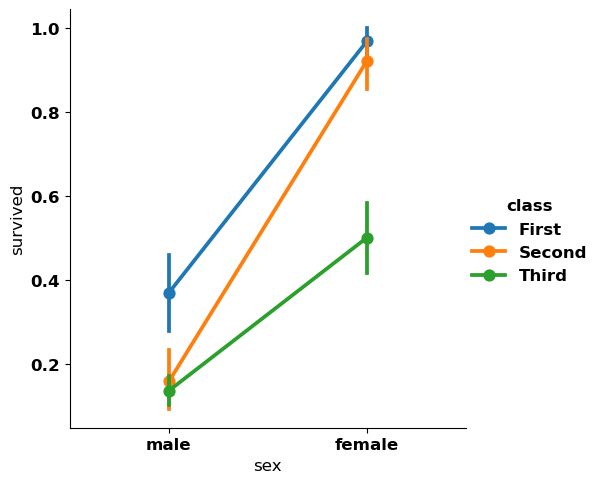

In [79]:
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic)

In [83]:
all_groups = []
mean_df = network_df[feature_columns + ["competition_closeness", "current_subject", "recording_file"]].groupby(["competition_closeness", "current_subject", "recording_file"]).mean().reset_index()
mean_df = mean_df.sort_values(by=["competition_closeness", "current_subject", "recording_file"])

mean_df['competition_closeness'] = pd.Categorical(mean_df['competition_closeness'], categories=sorted(mean_df["competition_closeness"].unique()), ordered=True)
mean_df = mean_df.sort_values('competition_closeness')

subjects_list = mean_df["current_subject"].unique().tolist()
colors_list = list(mcolors.BASE_COLORS.keys())

sorted_x_ticks = sorted(mean_df["competition_closeness"].unique())

In [84]:
sorted_x_ticks

['lose_comp', 'lose_non_comp', 'rewarded', 'win_comp', 'win_non_comp']

In [95]:
example_groups[2]

competition_closeness current_subject  \
2              lose_comp             1.1   
15              rewarded             1.1   
22              win_comp             1.1   
28          win_non_comp             1.1   

                                       recording_file  mPFC_theta_band_power  \
2   20230620_114347_standard_comp_to_omission_D4_s...               0.025941   
15  20230620_114347_standard_comp_to_omission_D4_s...               0.024917   
22  20230620_114347_standard_comp_to_omission_D4_s...               0.023379   
28  20230620_114347_standard_comp_to_omission_D4_s...               0.021632   

    mPFC_gamma_band_power  vHPC_theta_band_power  vHPC_gamma_band_power  \
2                0.002097               0.020878               0.003085   
15               0.001959               0.022093               0.002833   
22               0.001803               0.015907               0.002342   
28               0.001890               0.016195               0.002531   

    BLA_theta_band_power  BLA_gamma_band_power  LH_theta_band_power  ...  \
2               0.031779              0.002670             0.038396  ...   
15              0.026759              0.002734             0.034617  ...   
22              0.024702              0.002377             0.027738  ...   
28              0.023428              0.002274             0.028644  ...   

    mPFC_MD_theta_band_granger  mPFC_MD_gamma_band_granger  \
2                     0.573873                    0.282822   
15                    0.507639                    0.285651   
22                    0.495396                    0.285029   
28                    0.580175                    0.271671   

    MD_vHPC_theta_band_granger  MD_vHPC_gamma_band_granger  \
2                     0.313128                    0.297883   
15                    0.317276                    0.323502   
22                    0.295507                    0.325649   
28                    0.259483                    0.337499   

    vHPC_MD_theta_band_granger  vHPC_MD_gamma_band_granger  \
2                     0.650203                    0.268277   
15                    0.449385                    0.294469   
22                    0.475804                    0.282350   
28                    0.535811                    0.276211   

    mPFC_vHPC_theta_band_granger  mPFC_vHPC_gamma_band_granger  \
2                       0.330335                      0.330160   
15                      0.350617                      0.313655   
22                      0.297791                      0.312686   
28                      0.301412                      0.329150   

    vHPC_mPFC_theta_band_granger  vHPC_mPFC_gamma_band_granger  
2                       0.322606                      0.278934  
15                      0.331382                      0.279585  
22                      0.318703                      0.280610  
28                      0.320919                      0.282747  

[4 rows x 73 columns]

In [ ]:
        missing_values = set(sorted_x_ticks) - set(group['competition_closeness'])

        # Create a DataFrame with missing values
        missing_df = pd.DataFrame(list(missing_values), columns=['competition_closeness'])
        
        # Add other columns and fill with NaN or default values
        for col in mean_df.columns:
            if col != 'competition_closeness':
                missing_df[col] = pd.NA  # or a default value like 0 or ''

        # Concatenate the original df with missing_df
        full_df = pd.concat([group, missing_df])
        
        # Optional: Sort the DataFrame based on 'competition_closeness'
        full_df = full_df.sort_values('competition_closeness').reset_index(drop=True)
        
        ax.plot(full_df['competition_closeness'], full_df[col], label=label[0], marker="o", color=colors_list[subjects_list.index(label[0])])
        all_groups.append(full_df)

In [110]:
full_df["symbol"]

0     o
7     o
0      
20    o
26    o
Name: symbol, dtype: object

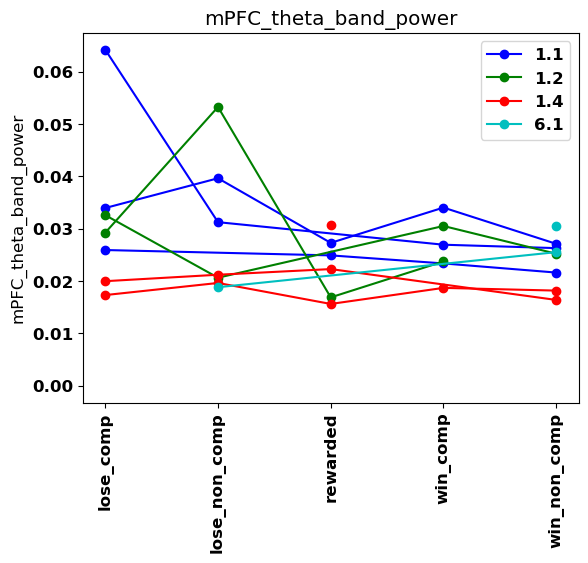

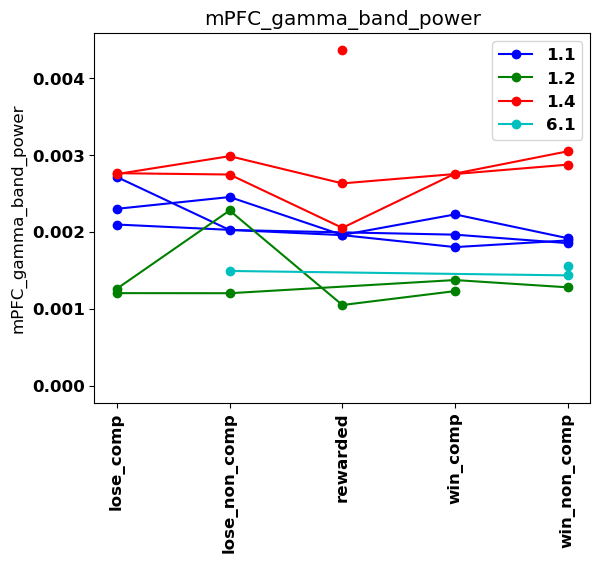

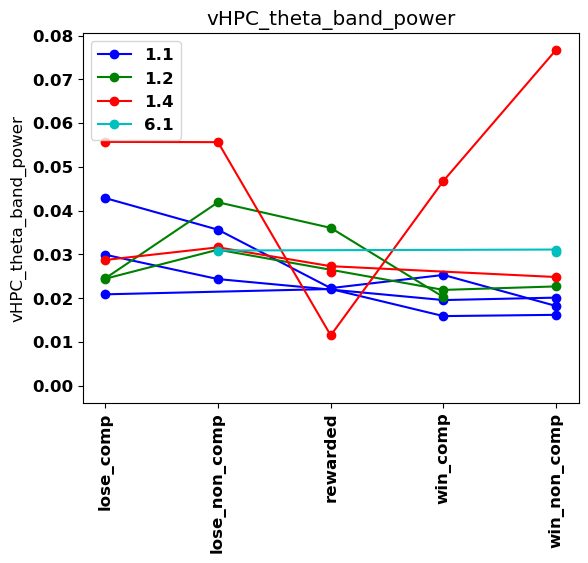

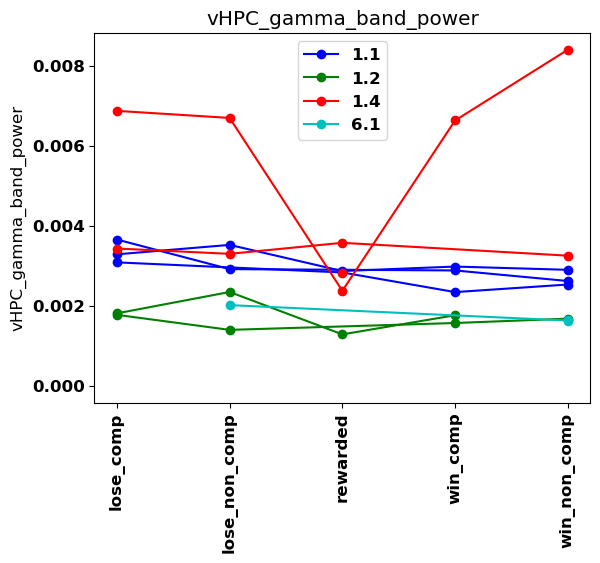

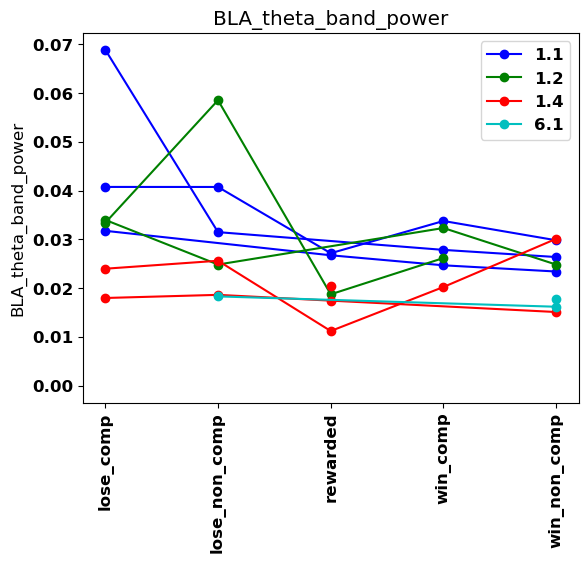

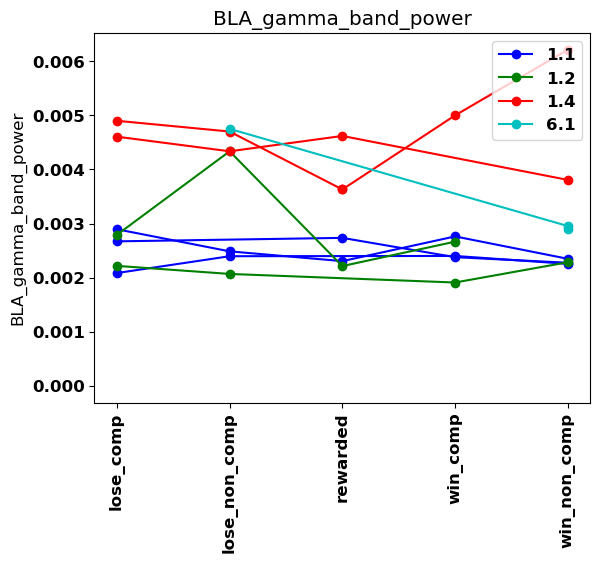

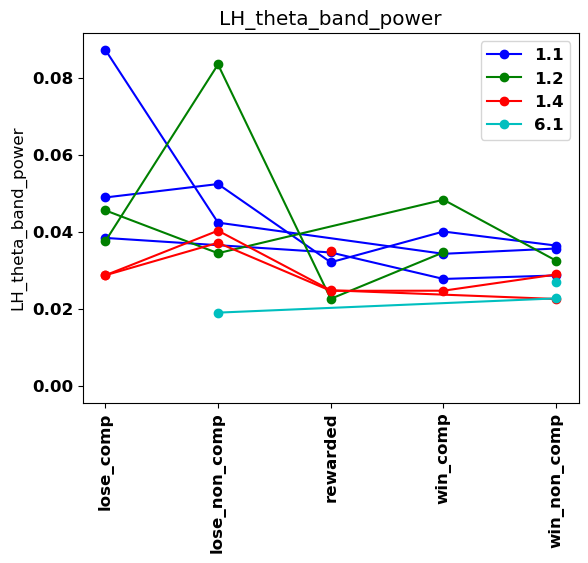

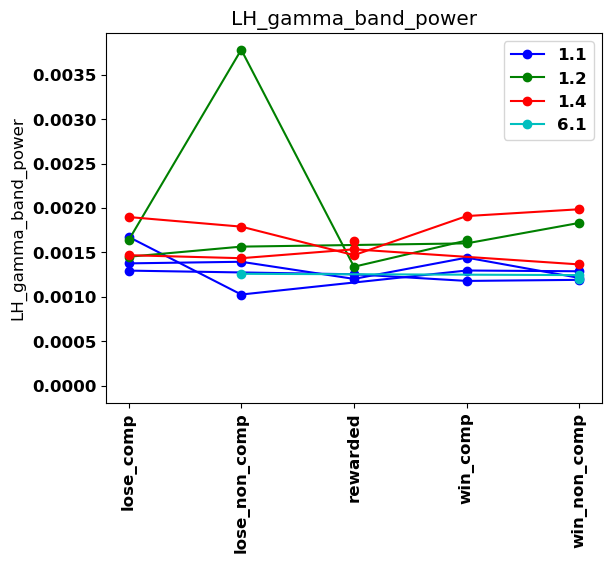

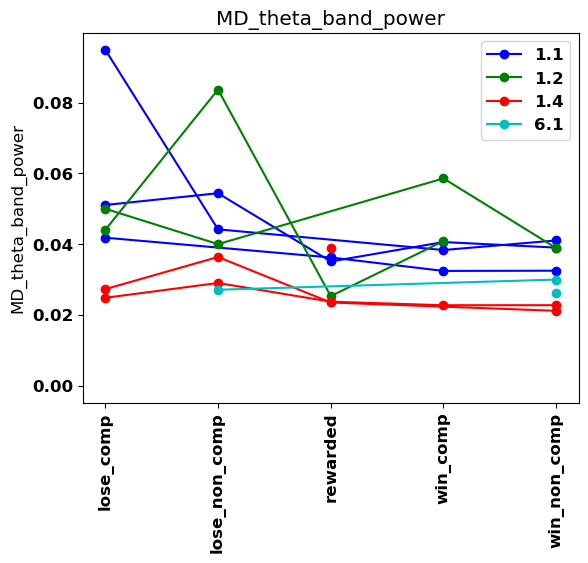

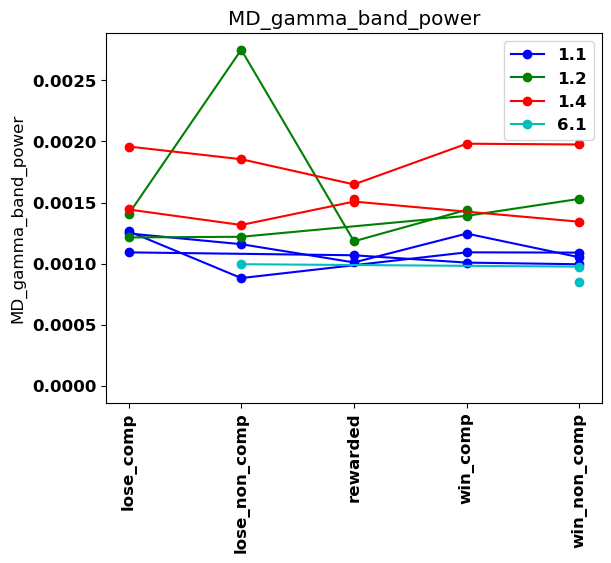

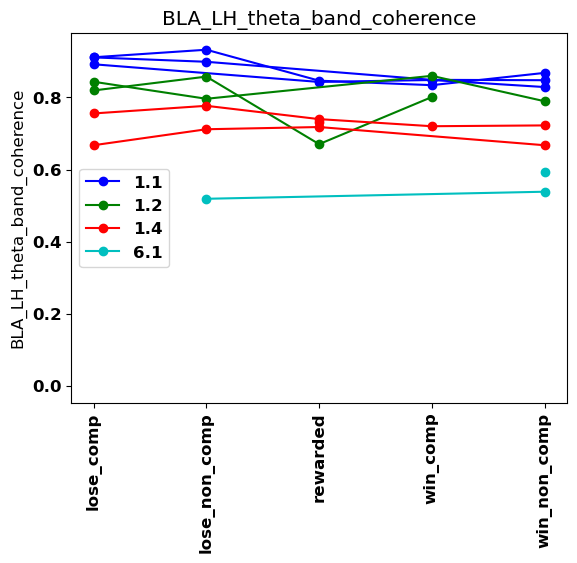

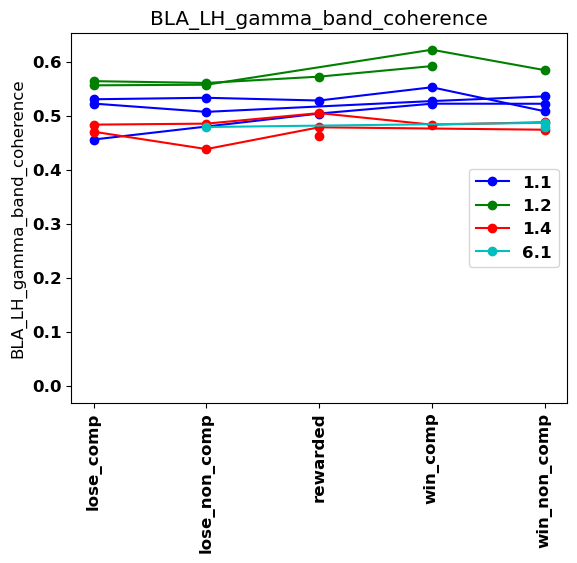

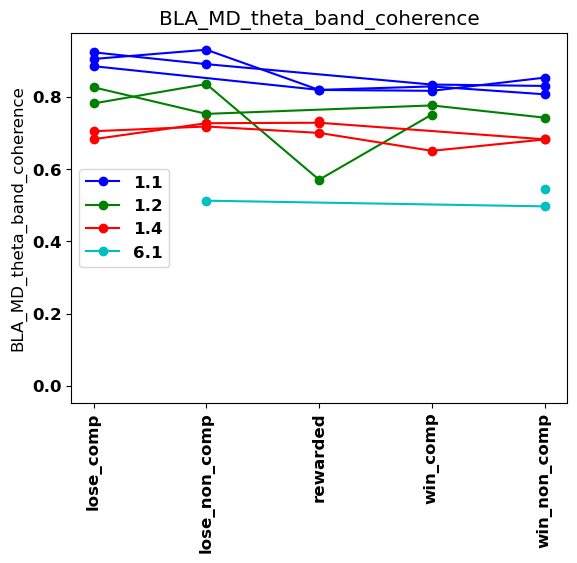

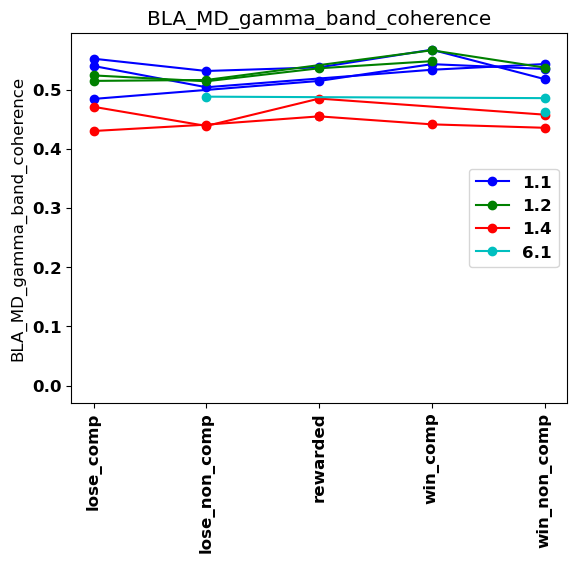

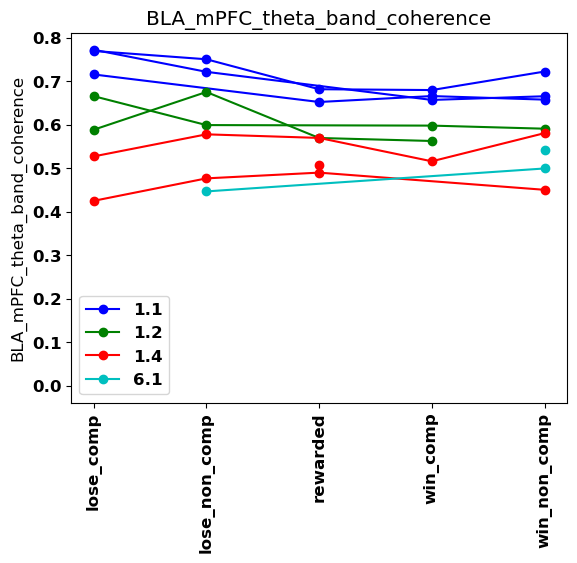

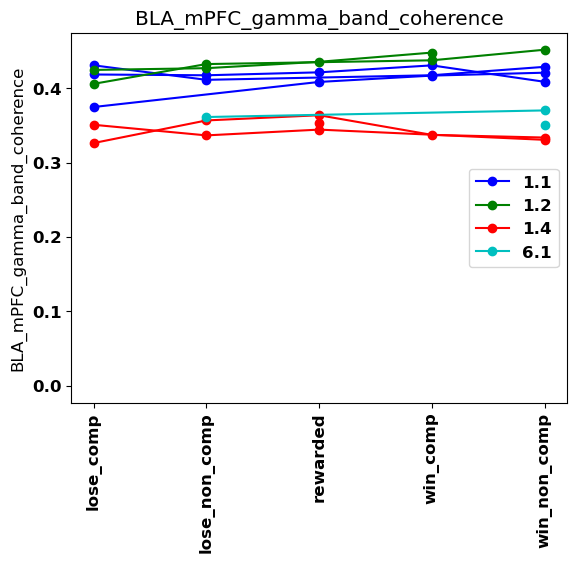

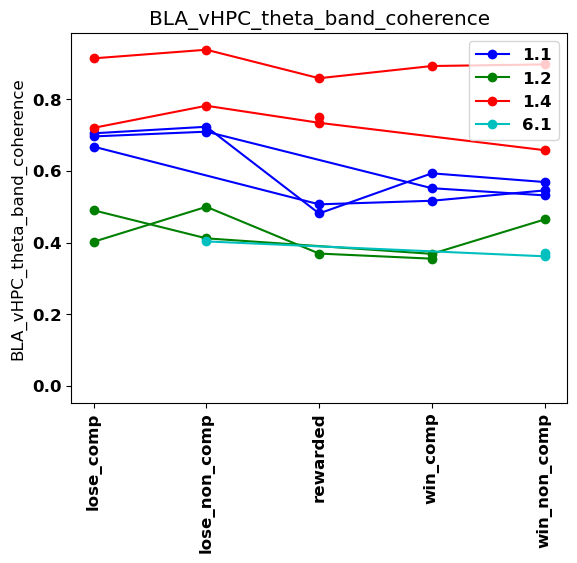

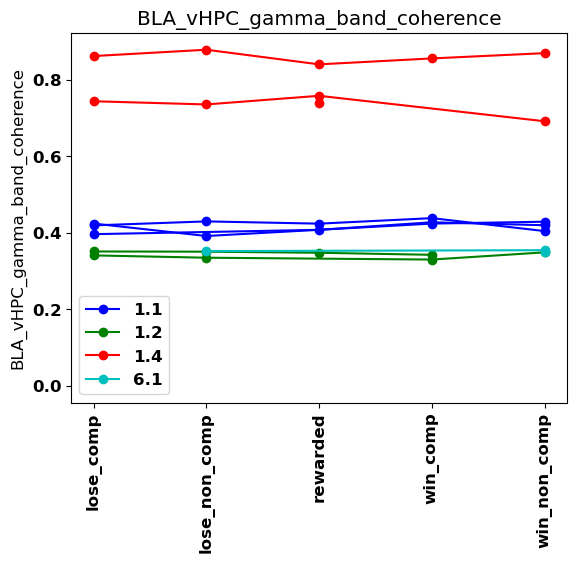

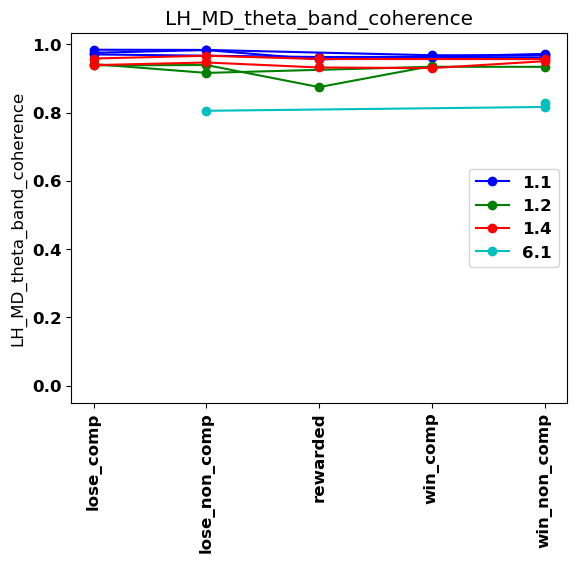

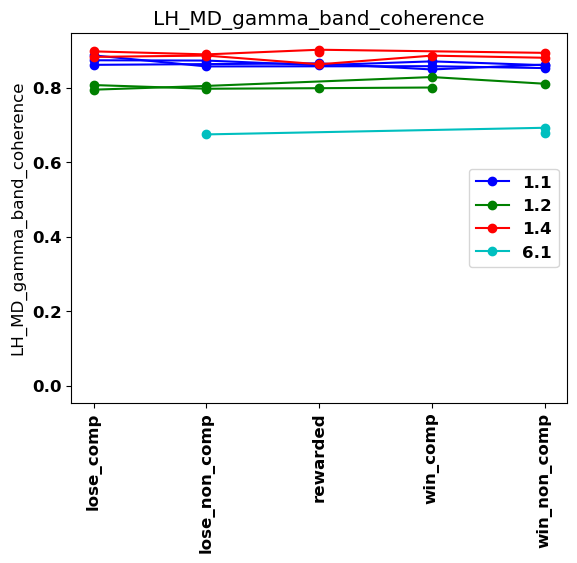

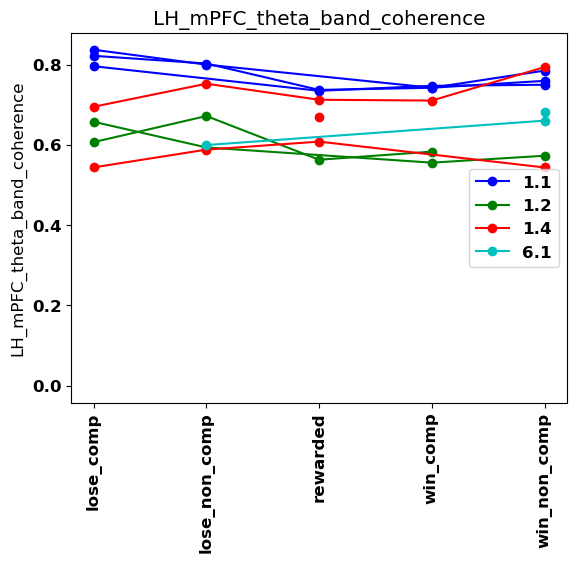

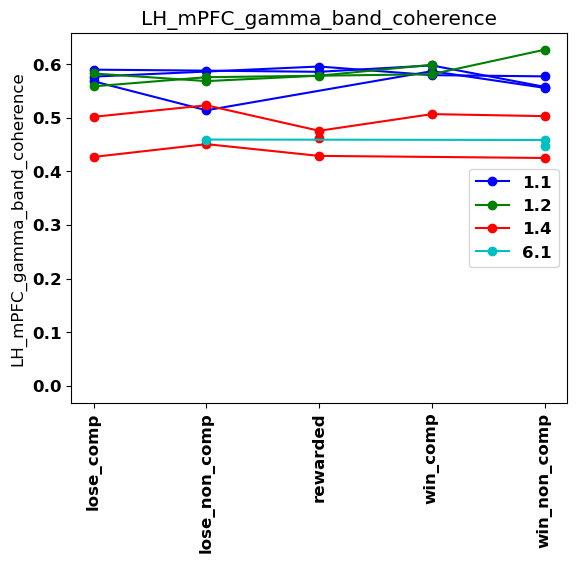

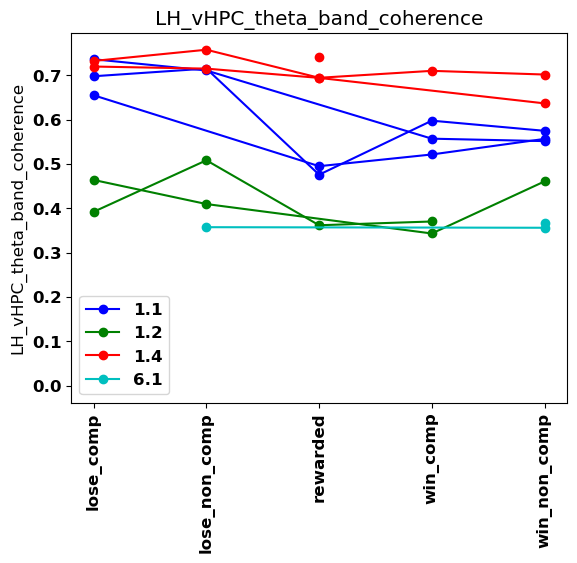

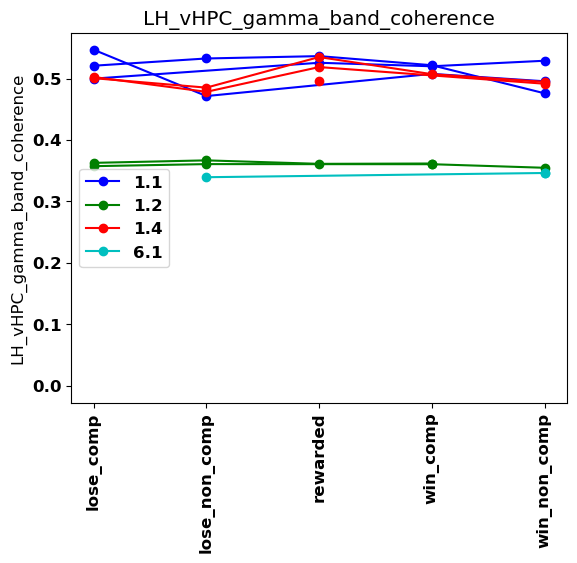

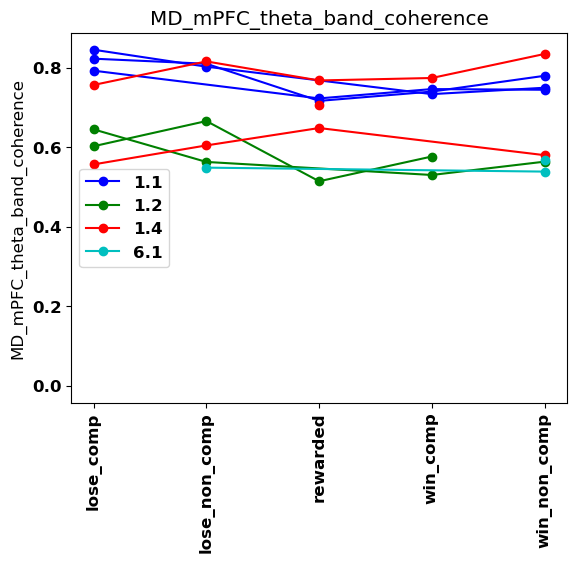

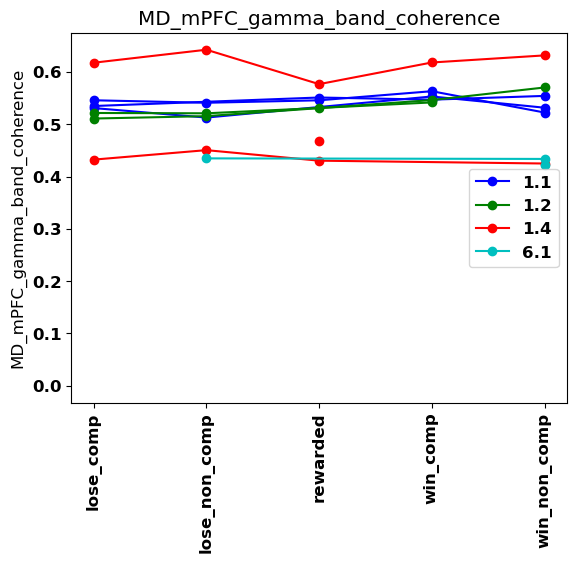

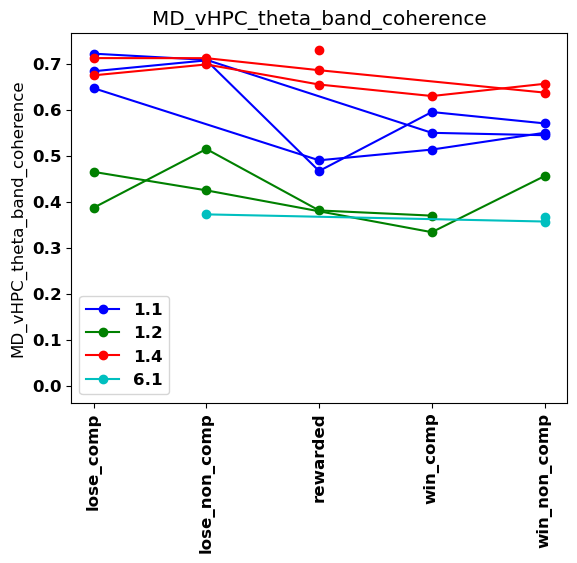

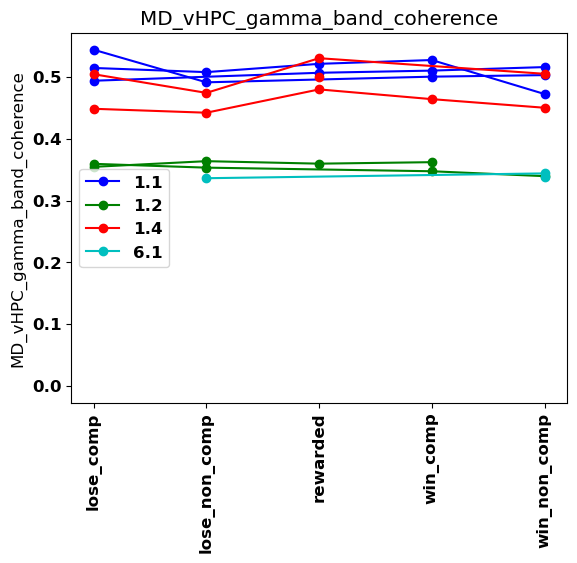

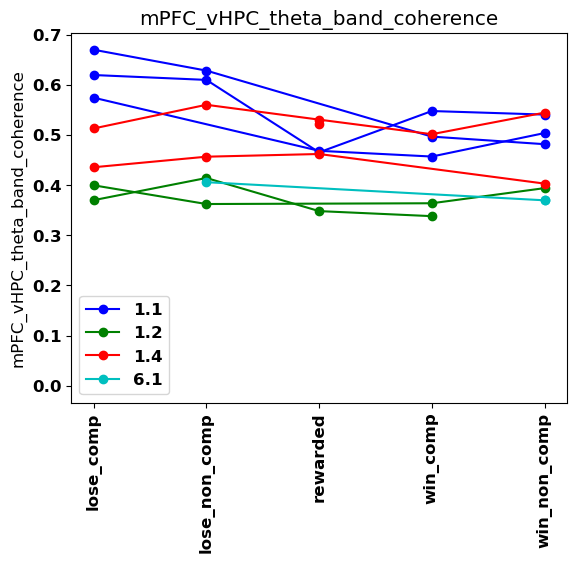

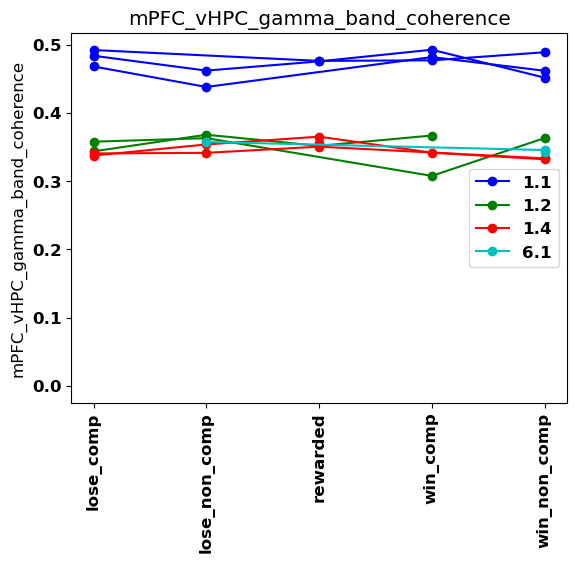

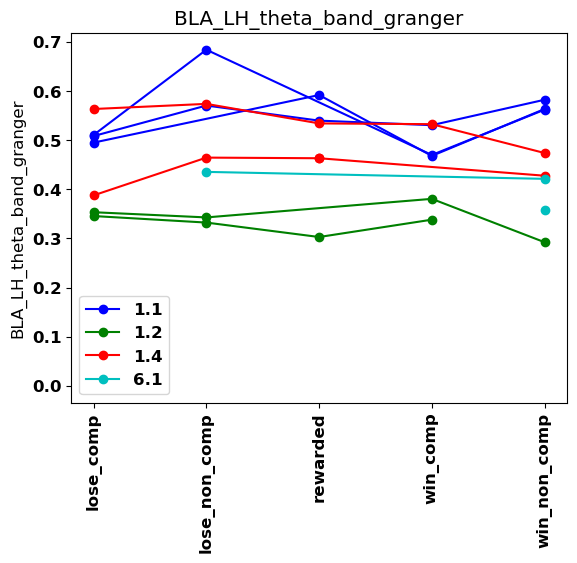

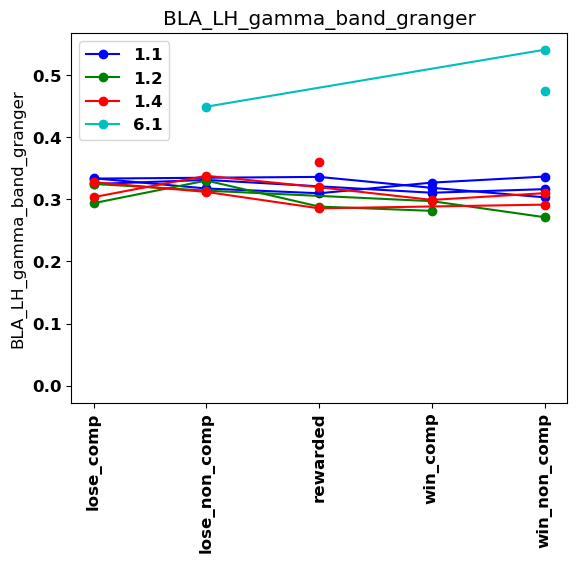

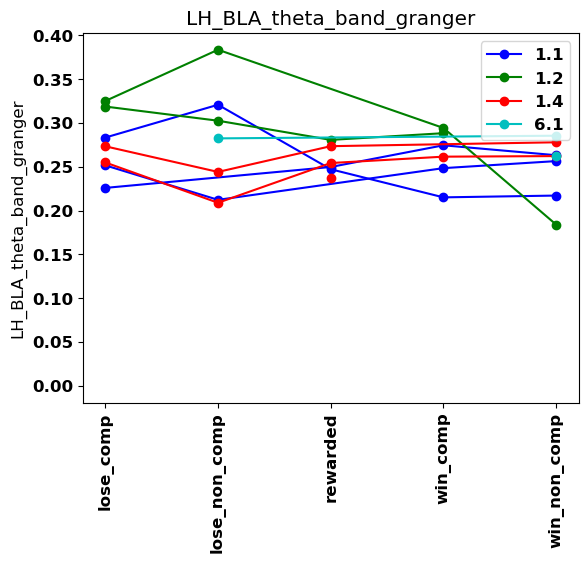

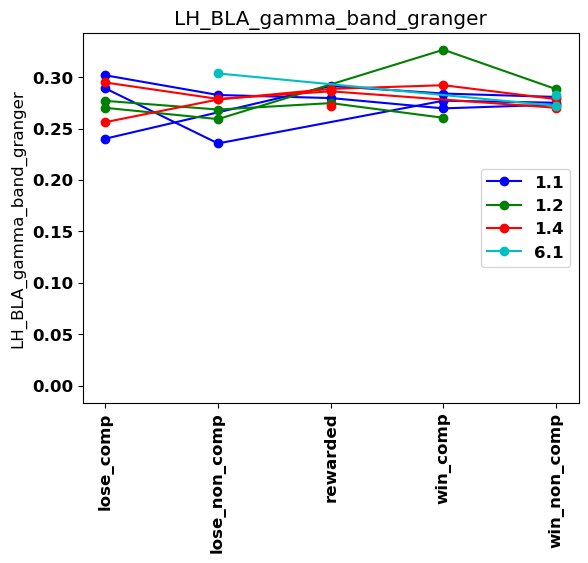

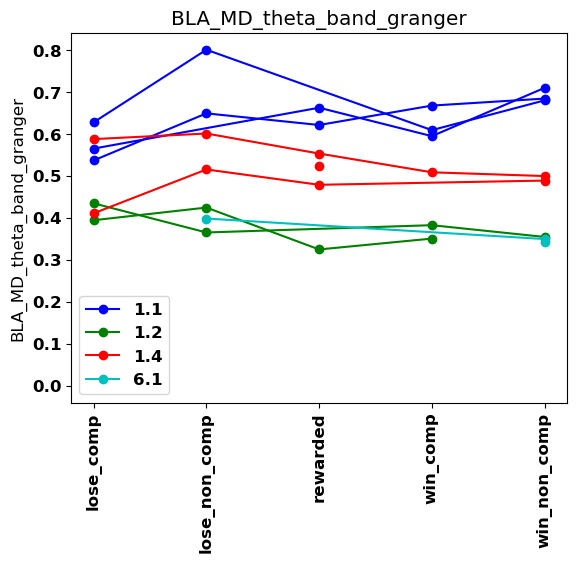

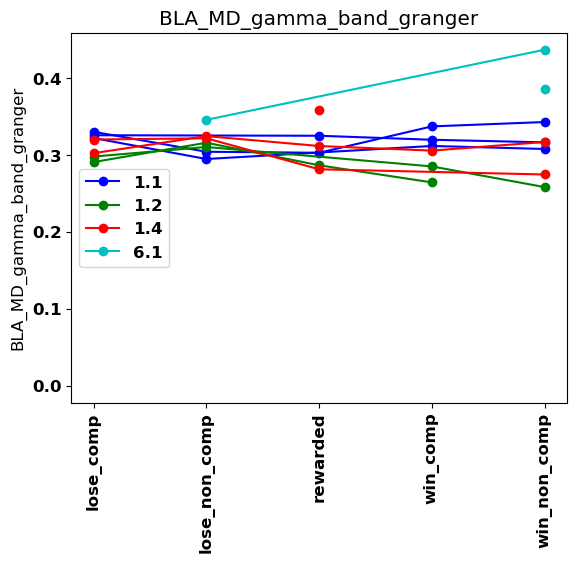

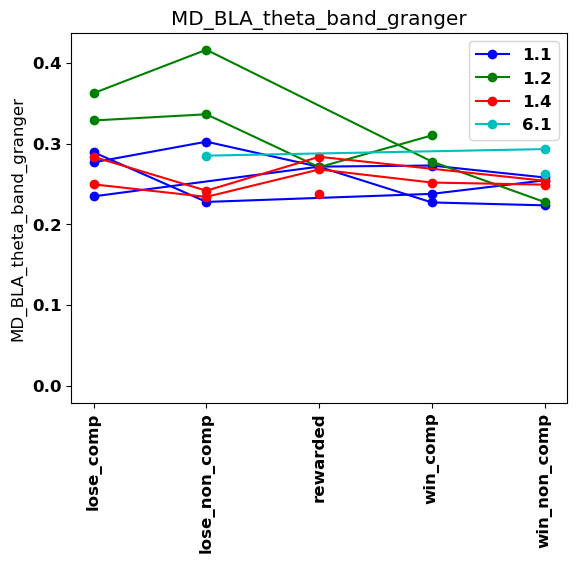

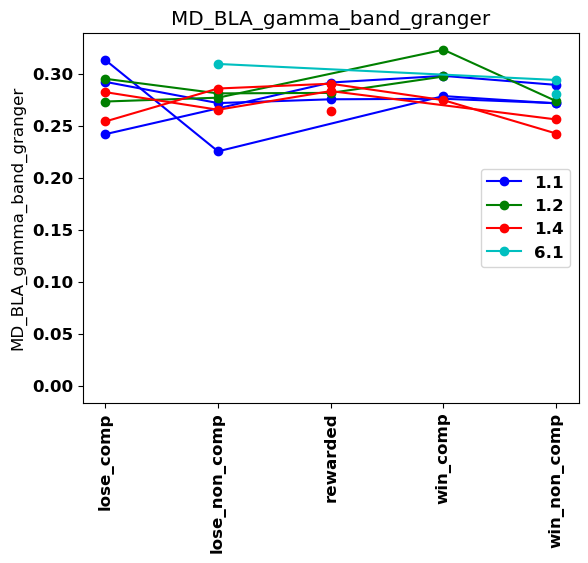

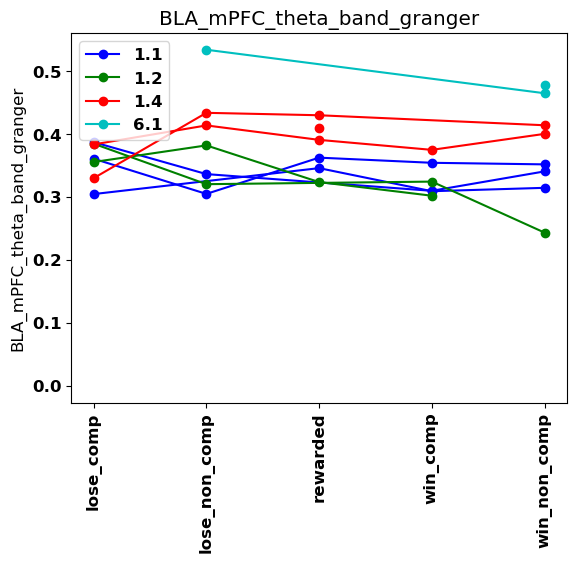

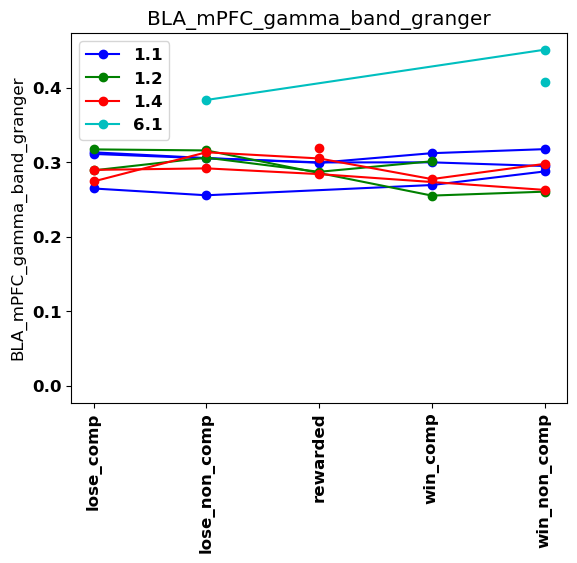

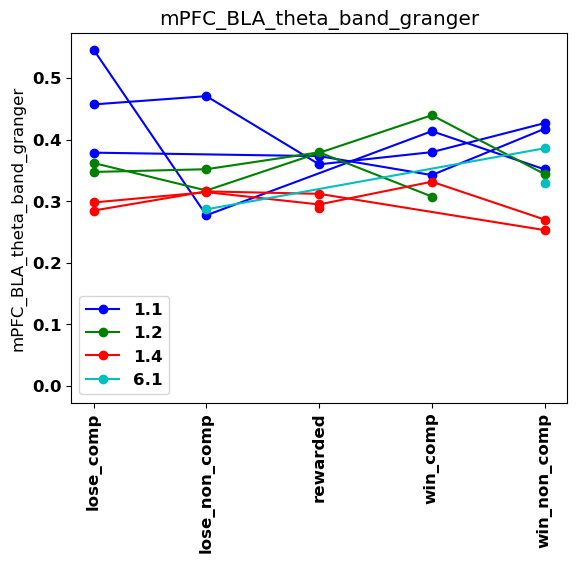

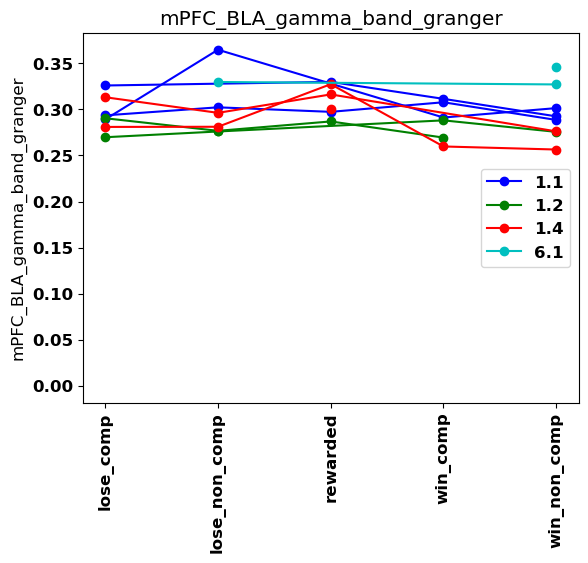

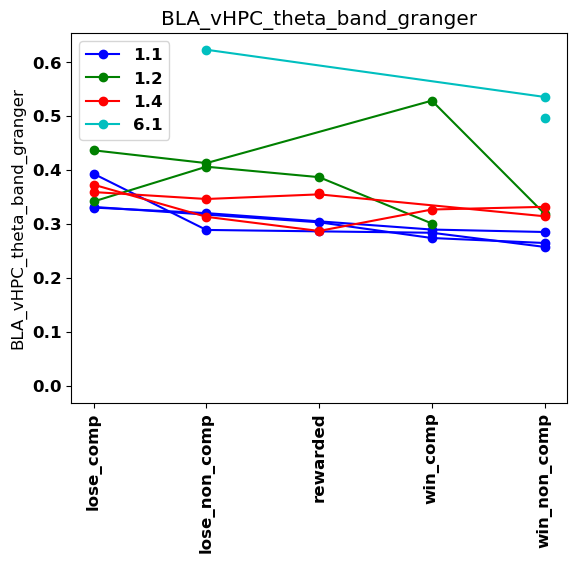

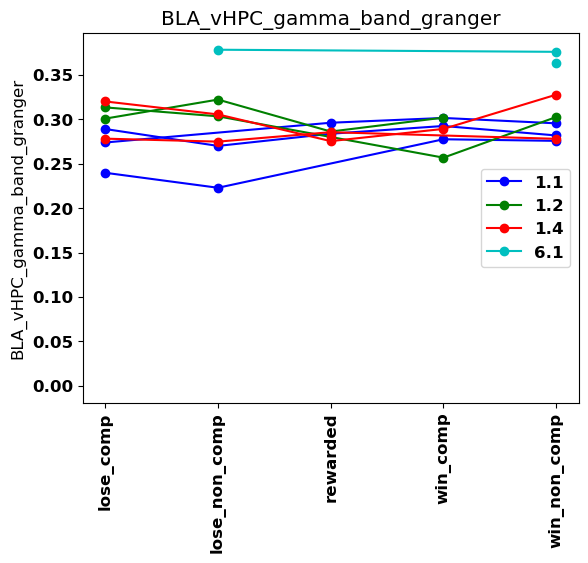

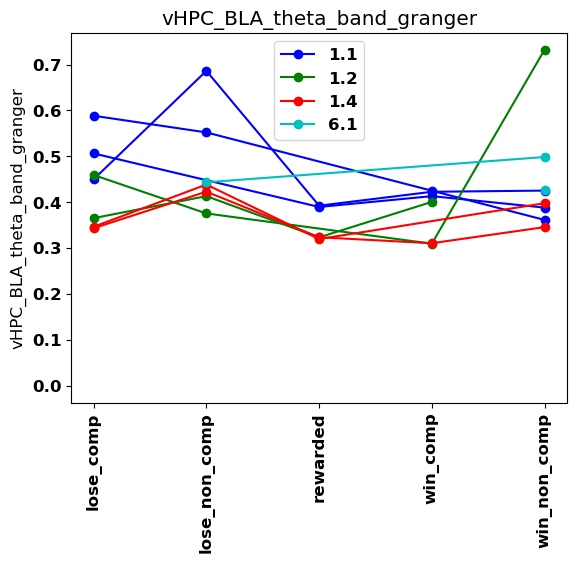

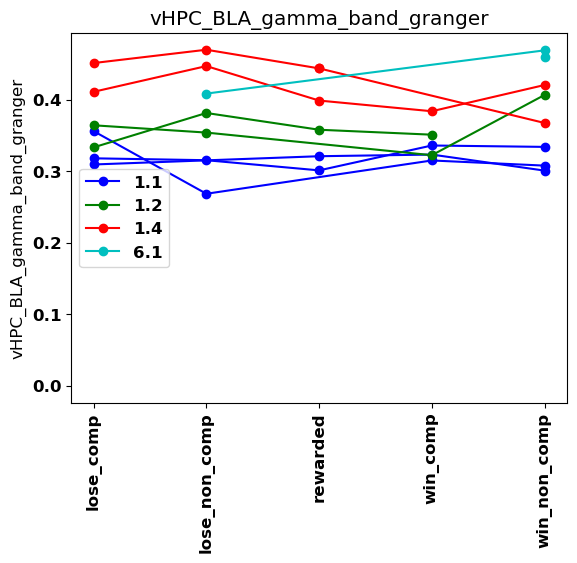

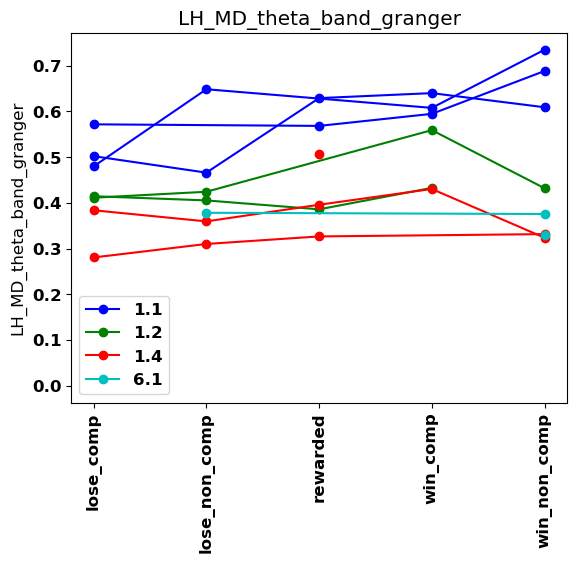

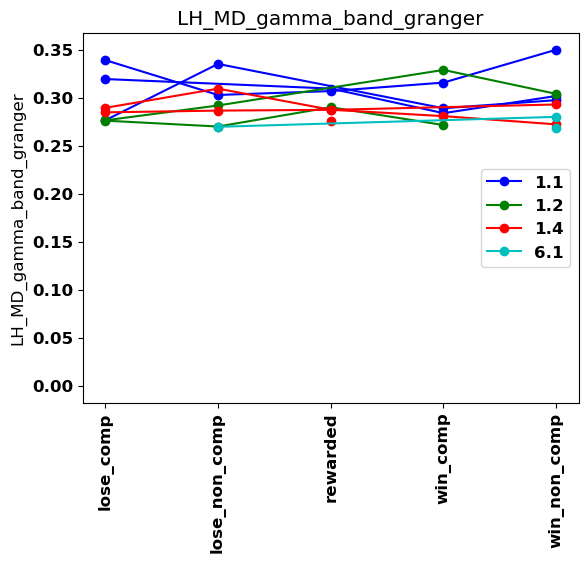

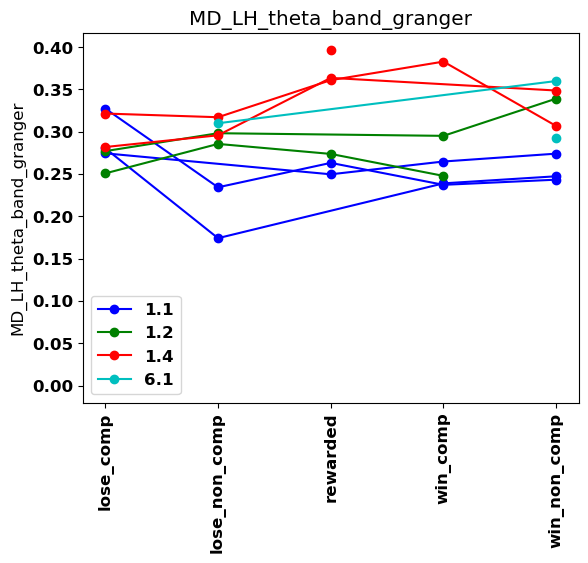

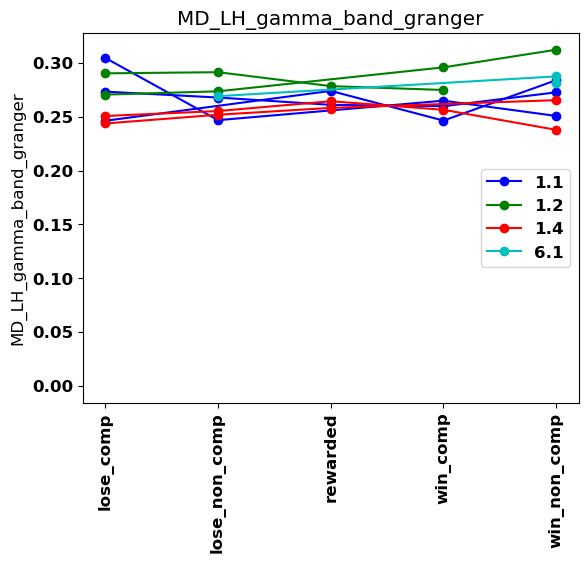

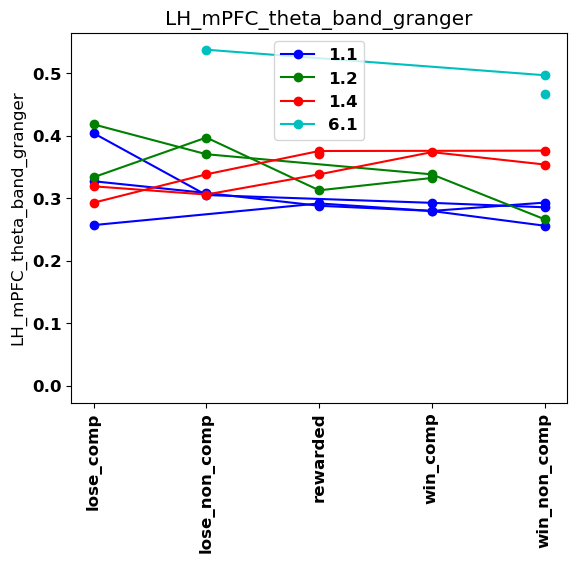

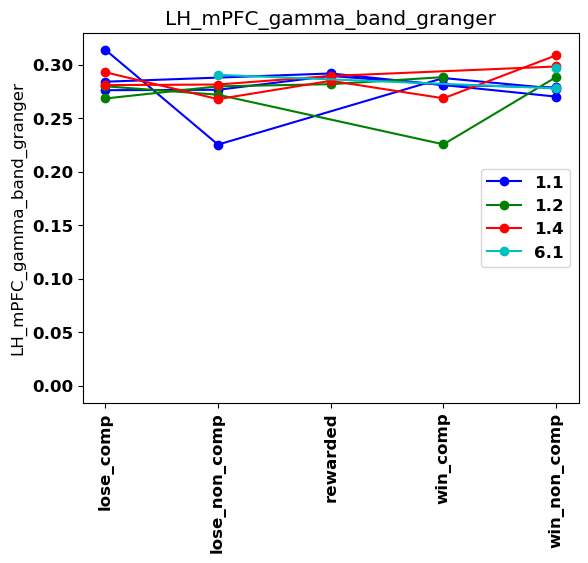

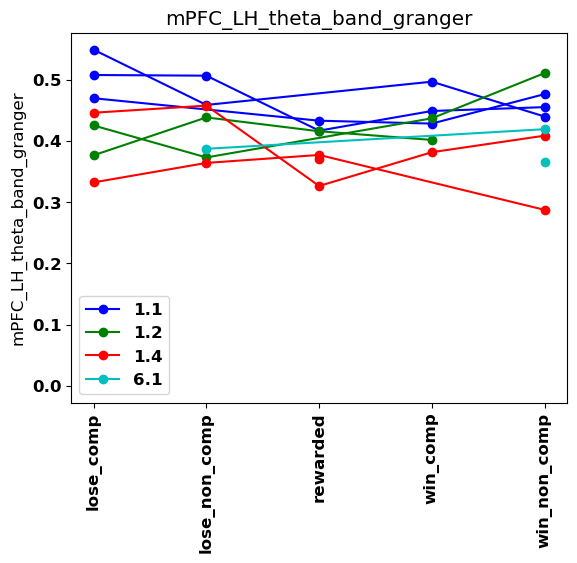

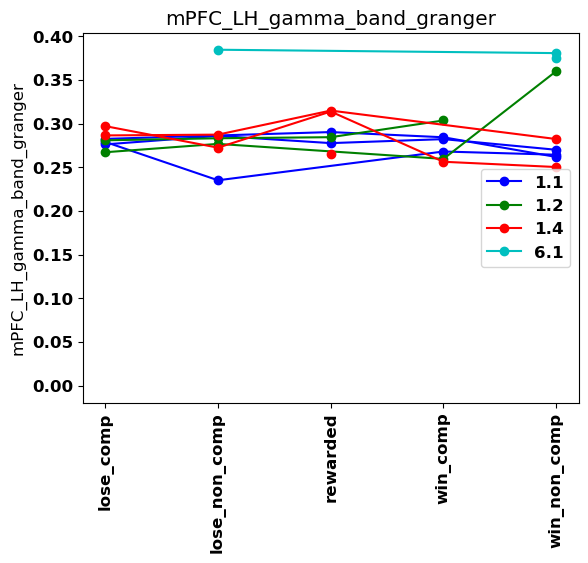

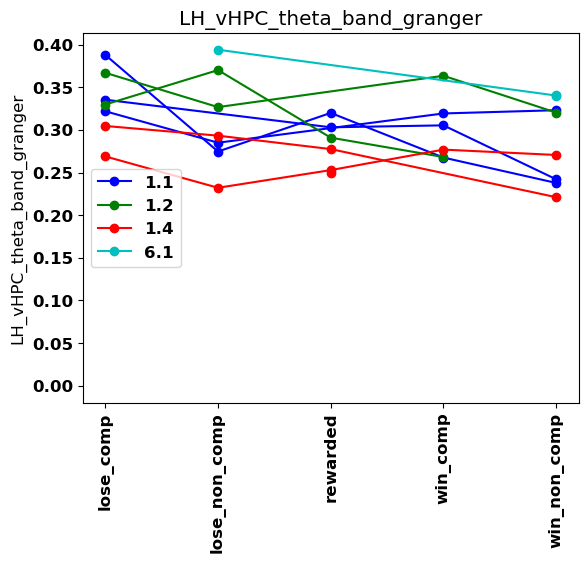

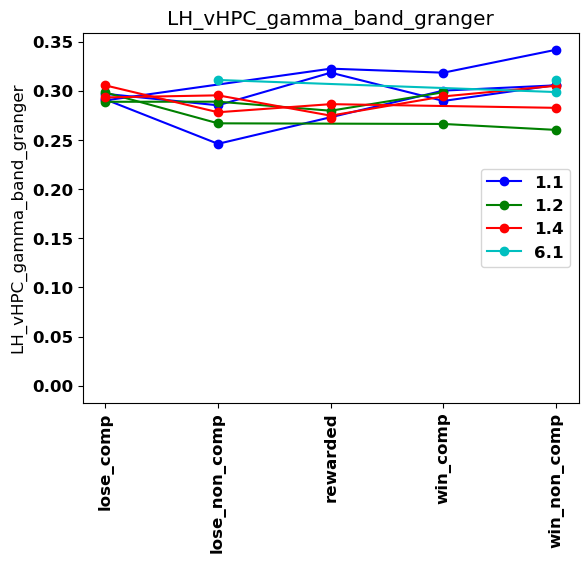

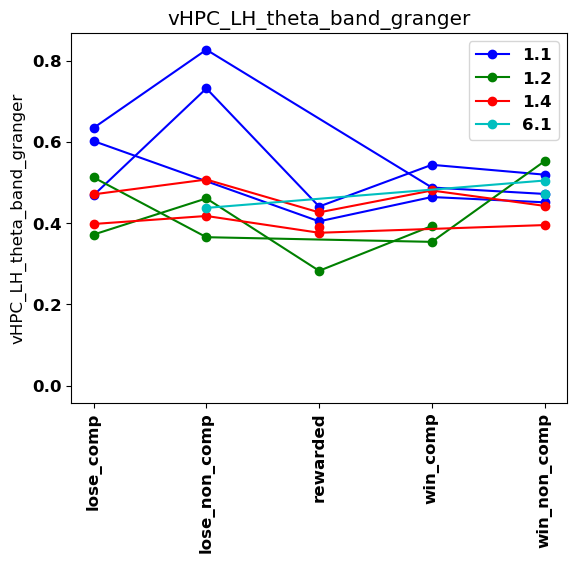

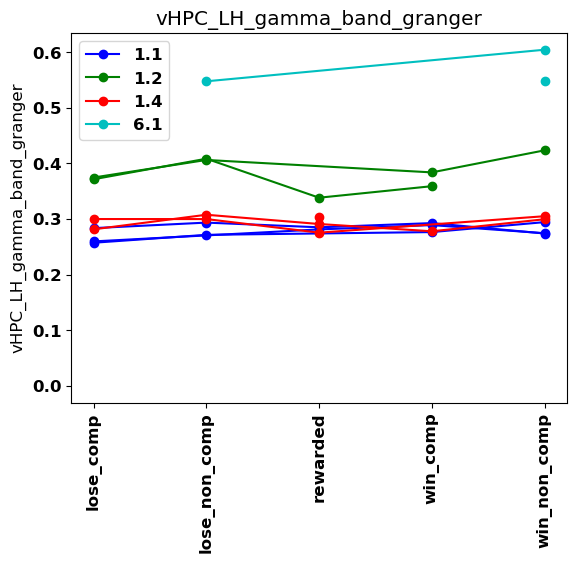

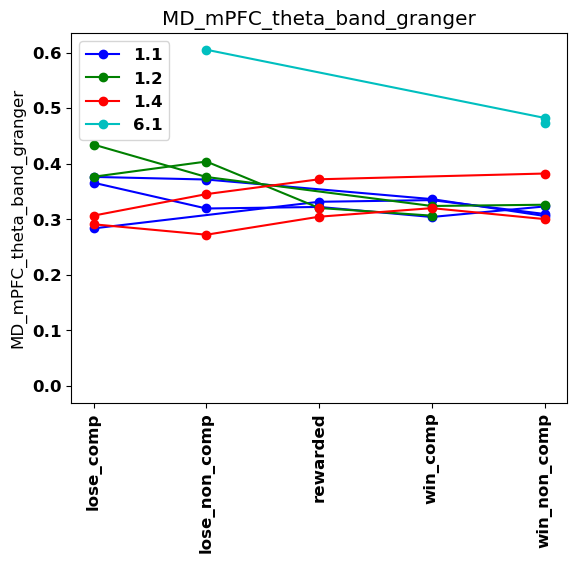

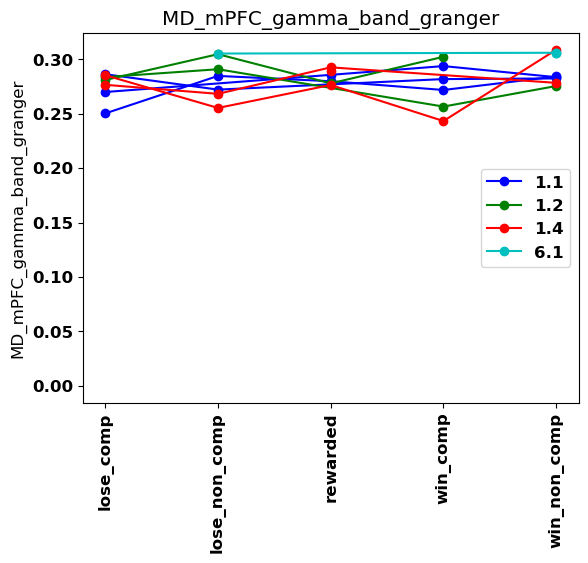

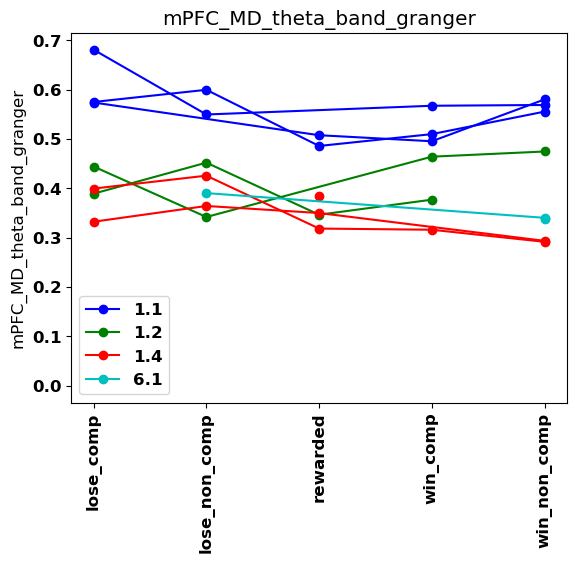

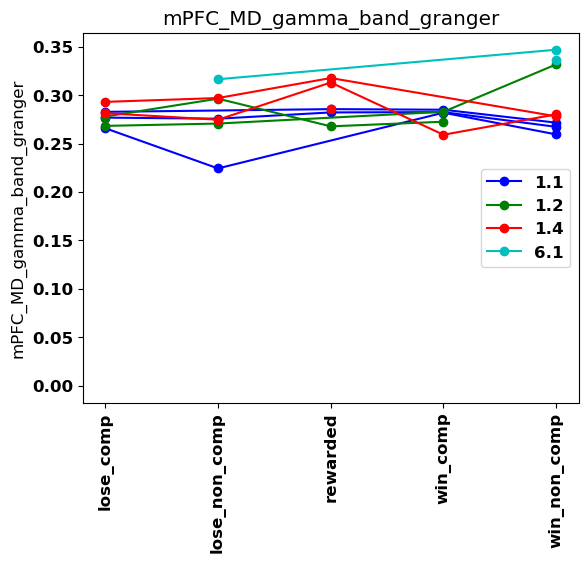

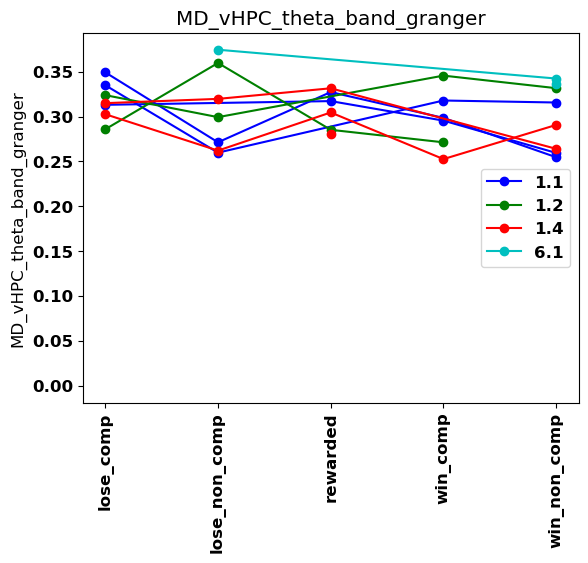

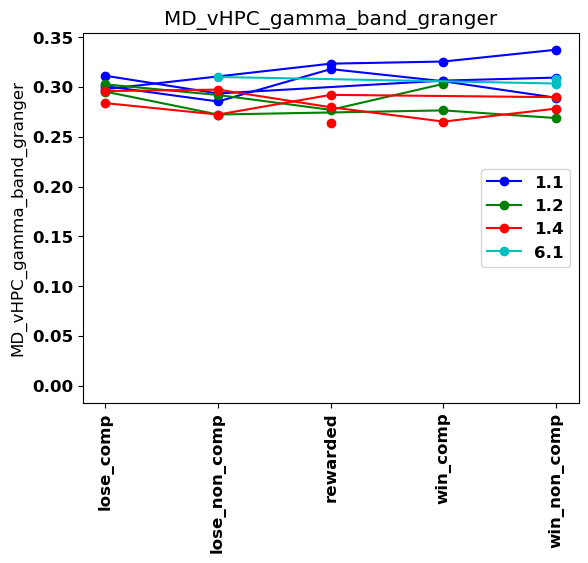

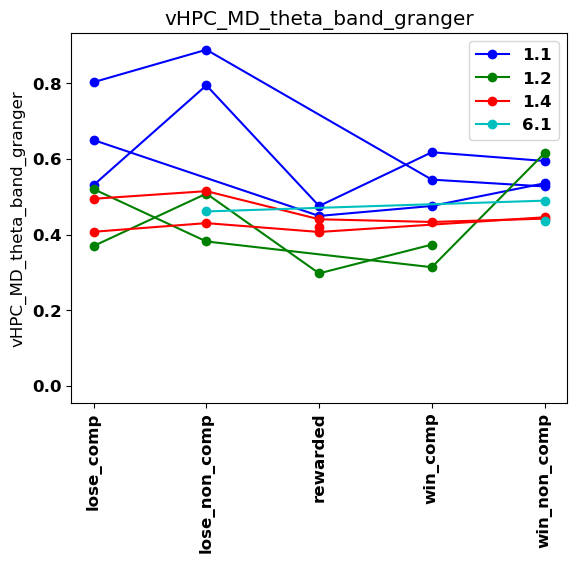

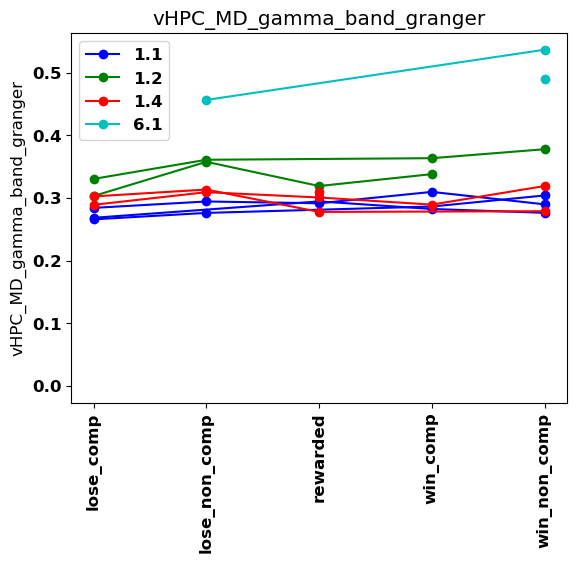

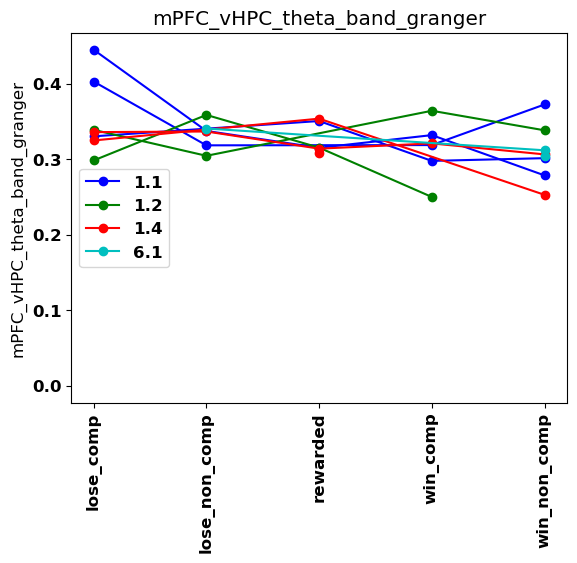

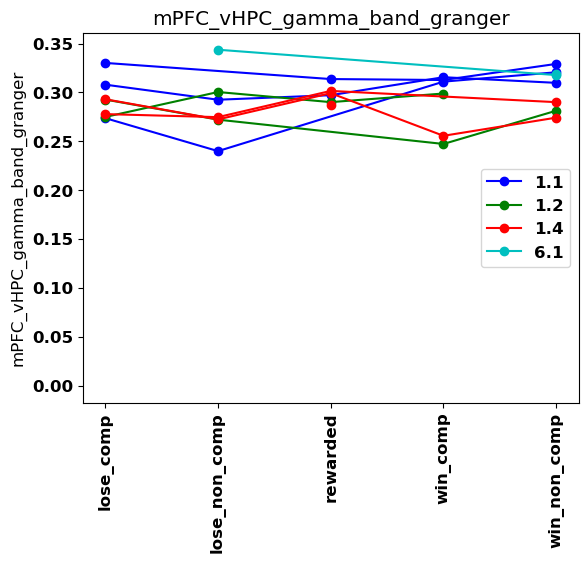

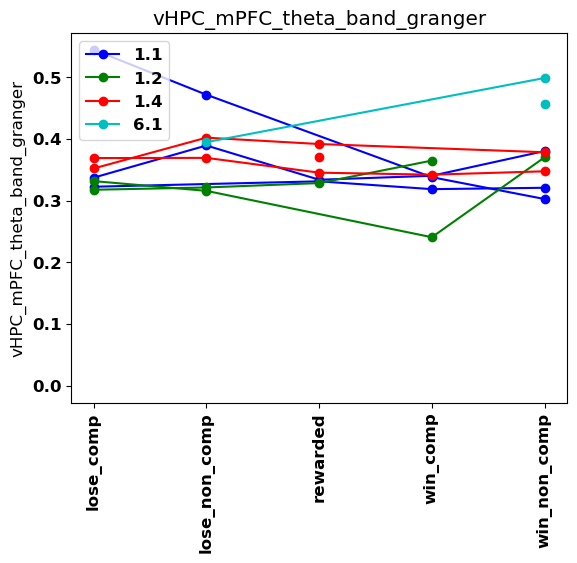

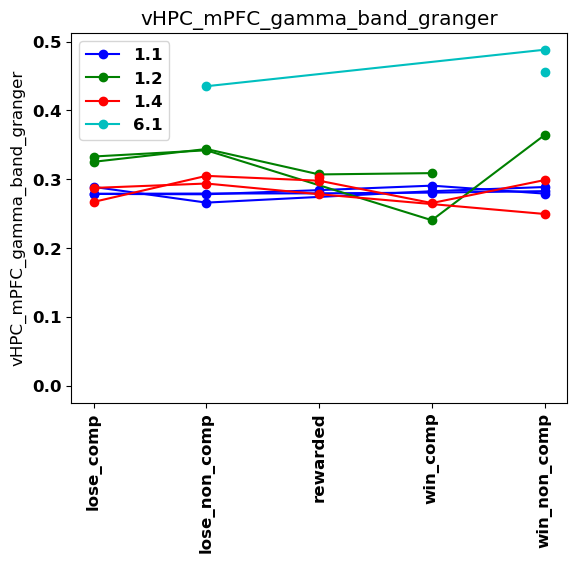

In [123]:
for feature_col in all_features:
    plt.ylabel(feature_col)
    plt.title(feature_col)

    plt.plot(sorted(mean_df["competition_closeness"].unique()), [0] * len(mean_df["competition_closeness"].unique()), linestyle='None')

    for label, group in mean_df.groupby(['current_subject', "recording_file"]):
        plt.plot(group['competition_closeness'], group[feature_col], marker="o", label=label[0], color=colors_list[subjects_list.index(label[0])])
    plt.xticks(rotation=90)

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.savefig("./proc/line_charts/line_chart_{}.png".format(feature_col))
    plt.show()

/tmp/ipykernel_2208797/3721362982.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  full_df = pd.concat([group[['competition_closeness', feature_col]], missing_df])


ValueError: 

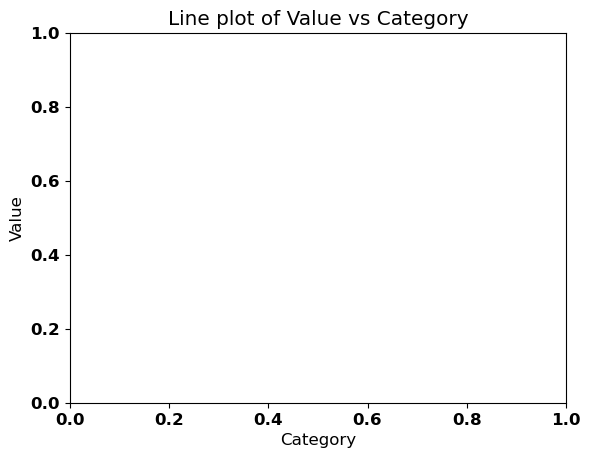

In [ ]:
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Line plot of Value vs Category')

example_groups = []
for label, group in mean_df.groupby(['current_subject', "recording_file"]):
    example_groups.append(group)

    missing_values = set(sorted_x_ticks) - set(group['competition_closeness'])

    # Create a DataFrame with missing values
    missing_df = pd.DataFrame(list(missing_values), columns=['competition_closeness'])
    missing_df[feature_col] = pd.NA  # or a default value like 0 or ''

    # Concatenate the original df with missing_df
    full_df = pd.concat([group[['competition_closeness', feature_col]], missing_df])
    group = full_df.sort_values(['competition_closeness'])

    raise ValueError()
    plt.plot(group['competition_closeness'], group[feature_col], label=label)




plt.show()

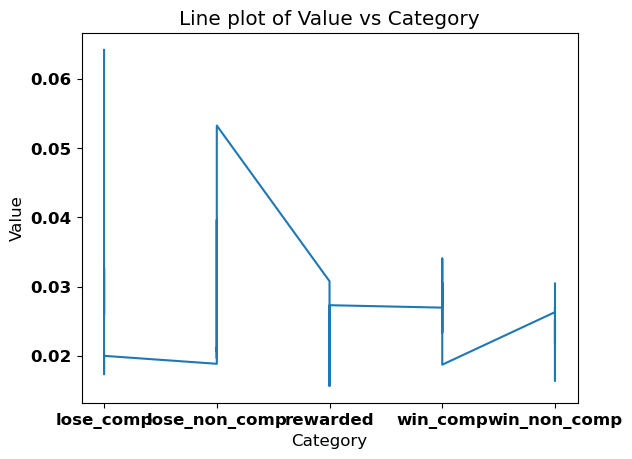

/tmp/ipykernel_2208797/282068964.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  full_df = pd.concat([group, missing_df])
/tmp/ipykernel_2208797/282068964.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  full_df = pd.concat([group, missing_df])
/tmp/ipykernel_2208797/282068964.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

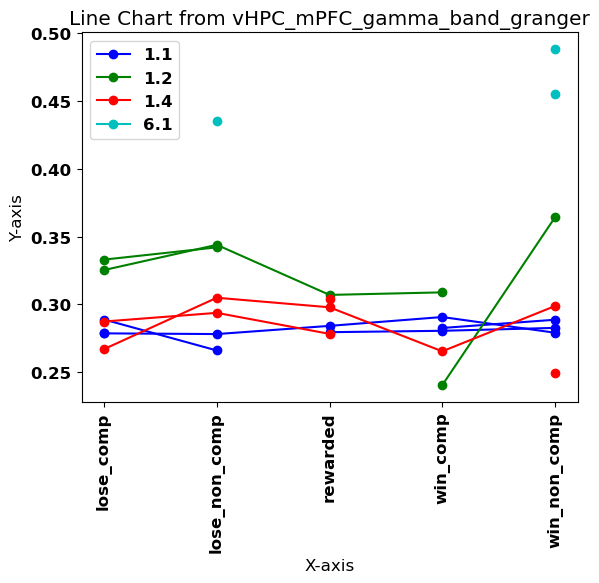

SyntaxError: 'break' outside loop (282068964.py, line 51)

In [76]:
import matplotlib.pyplot as plt

all_groups = []
mean_df = network_df[feature_columns + ["competition_closeness", "current_subject", "recording_file"]].groupby(["competition_closeness", "current_subject", "recording_file"]).mean().reset_index()
mean_df = mean_df.sort_values(by=["competition_closeness", "current_subject", "recording_file"])

mean_df['competition_closeness'] = pd.Categorical(mean_df['competition_closeness'], categories=sorted(mean_df["competition_closeness"].unique()), ordered=True)
mean_df = mean_df.sort_values('competition_closeness')

subjects_list = mean_df["current_subject"].unique().tolist()
colors_list = list(mcolors.BASE_COLORS.keys())

sorted_x_ticks = sorted(mean_df["competition_closeness"].unique())
for feature_col in all_features:
    # Plotting
    fig, ax = plt.subplots()    
    plt.xticks(ticks=range(len(sorted_x_ticks)), labels=sorted_x_ticks, rotation=90)
    for label, group in mean_df.groupby(['current_subject', "recording_file"]):
        group = group.sort_values(['competition_closeness'])
        missing_values = set(sorted_x_ticks) - set(group['competition_closeness'])

        # Create a DataFrame with missing values
        missing_df = pd.DataFrame(list(missing_values), columns=['competition_closeness'])
        
        # Add other columns and fill with NaN or default values
        for col in mean_df.columns:
            if col != 'competition_closeness':
                missing_df[col] = pd.NA  # or a default value like 0 or ''

        # Concatenate the original df with missing_df
        full_df = pd.concat([group, missing_df])
        
        # Optional: Sort the DataFrame based on 'competition_closeness'
        full_df = full_df.sort_values('competition_closeness').reset_index(drop=True)
        
        ax.plot(full_df['competition_closeness'], full_df[col], label=label[0], marker="o", color=colors_list[subjects_list.index(label[0])])
        all_groups.append(full_df)
        
    # Adding labels and title
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('Line Chart from {}'.format(col))
    ax.legend()
    # plt.ylim(0, 0.06)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.savefig("./proc/line_charts/line_chart_{}.png".format(col))
    plt.show()
    break
break


In [ ]:
all_groups[0]

competition_closeness current_subject  \
0             lose_comp             1.1   
1         lose_non_comp             1.1   
2              rewarded             NaN   
3              win_comp             1.1   
4          win_non_comp             1.1   

                                      recording_file  mPFC_theta_band_power  \
0  20230617_115521_standard_comp_to_omission_D1_s...               0.064231   
1  20230617_115521_standard_comp_to_omission_D1_s...               0.031266   
2                                                NaN                    NaN   
3  20230617_115521_standard_comp_to_omission_D1_s...               0.026957   
4  20230617_115521_standard_comp_to_omission_D1_s...               0.026306   

   mPFC_gamma_band_power  vHPC_theta_band_power  vHPC_gamma_band_power  \
0               0.002715               0.029924               0.003657   
1               0.002026               0.024358               0.002916   
2                    NaN                    NaN                    NaN   
3               0.001965               0.019568               0.002883   
4               0.001855               0.020127               0.002619   

   BLA_theta_band_power  BLA_gamma_band_power  LH_theta_band_power  ...  \
0              0.068926              0.002084             0.087284  ...   
1              0.031508              0.002395             0.042368  ...   
2                   NaN                   NaN                  NaN  ...   
3              0.027866              0.002400             0.034267  ...   
4              0.026400              0.002254             0.035645  ...   

   mPFC_MD_theta_band_granger  mPFC_MD_gamma_band_granger  \
0                    0.680861                    0.265920   
1                    0.549619                    0.224411   
2                         NaN                         NaN   
3                    0.567331                    0.281953   
4                    0.568914                    0.259540   

   MD_vHPC_theta_band_granger  MD_vHPC_gamma_band_granger  \
0                    0.334953                    0.311391   
1                    0.259815                    0.293544   
2                         NaN                         NaN   
3                    0.317938                    0.306490   
4                    0.315699                    0.309515   

   vHPC_MD_theta_band_granger  vHPC_MD_gamma_band_granger  \
0                    0.803559                    0.265812   
1                    0.889331                    0.276099   
2                         NaN                         NaN   
3                    0.545507                    0.286290   
4                    0.527472                    0.303929   

   mPFC_vHPC_theta_band_granger  mPFC_vHPC_gamma_band_granger  \
0                      0.402901                      0.273693   
1                      0.318398                      0.239948   
2                           NaN                           NaN   
3                      0.318737                      0.311007   
4                      0.372515                      0.320601   

   vHPC_mPFC_theta_band_granger  vHPC_mPFC_gamma_band_granger  
0                      0.544727                      0.288915  
1                      0.471809                      0.266100  
2                           NaN                           NaN  
3                      0.338081                      0.282684  
4                      0.302676                      0.288759  

[5 rows x 73 columns]

theta power only ['mPFC_theta_band_power', 'vHPC_theta_band_power', 'BLA_theta_band_power', 'LH_theta_band_power', 'MD_theta_band_power']


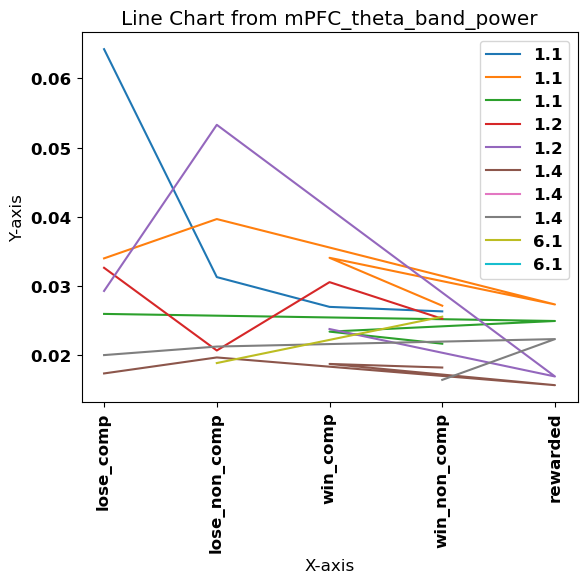

In [ ]:
all_groups = []
for feature, all_columns in sub_feature_to_columns.items():
    print(feature, all_columns)
    current_df = network_df[all_columns + ["competition_closeness", "current_subject", "recording_file"]].groupby(["competition_closeness", "current_subject", "recording_file"]).mean().reset_index()
    current_df = current_df.sort_values(by='competition_closeness')
    for col in all_columns:
        # Plotting
        fig, ax = plt.subplots()
        
        
        
        for label, group in current_df.groupby(['current_subject', "recording_file"]):
            group = group.sort_values(by='competition_closeness')  # Sorting might be necessary for categorical x
            ax.plot(group['competition_closeness'], group[col], label=label[0])
            all_groups.append(group)
            
        # Adding labels and title
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')
        ax.set_title('Line Chart from {}'.format(col))
        ax.legend()
        # plt.ylim(0, 0.06)
        plt.xticks(rotation=90)
        plt.show()
        break
    break

In [ ]:
all_groups[4]

competition_closeness current_subject  \
4              lose_comp             1.2   
10         lose_non_comp             1.2   
16              rewarded             1.2   
24              win_comp             1.2   

                                       recording_file  mPFC_theta_band_power  \
4   20230620_114347_standard_comp_to_omission_D4_s...               0.029260   
10  20230620_114347_standard_comp_to_omission_D4_s...               0.053289   
16  20230620_114347_standard_comp_to_omission_D4_s...               0.016890   
24  20230620_114347_standard_comp_to_omission_D4_s...               0.023754   

    vHPC_theta_band_power  BLA_theta_band_power  LH_theta_band_power  \
4                0.024533              0.033418             0.037517   
10               0.041907              0.058573             0.083455   
16               0.036060              0.018754             0.022577   
24               0.020250              0.026196             0.034649   

    MD_theta_band_power  
4              0.044042  
10             0.083705  
16             0.025331  
24             0.040863

In [ ]:
group

competition_closeness current_subject  \
33          win_non_comp             6.1   

                                  recording_file  mPFC_theta_band_power  \
33  20221215_145401_comp_amd_om_6_1_top_4_base_3               0.030442   

    vHPC_theta_band_power  BLA_theta_band_power  LH_theta_band_power  \
33               0.030602              0.017872             0.027009   

    MD_theta_band_power  
33             0.026133

In [ ]:
group

competition_closeness current_subject  \
33          win_non_comp             6.1   

                                  recording_file  mPFC_theta_band_power  \
33  20221215_145401_comp_amd_om_6_1_top_4_base_3               0.030442   

    vHPC_theta_band_power  BLA_theta_band_power  LH_theta_band_power  \
33               0.030602              0.017872             0.027009   

    MD_theta_band_power  
33             0.026133

In [ ]:
network_df

In [ ]:
raise ValueError()

In [ ]:
for feature, all_columns in sub_feature_to_columns.items():
    print(feature, all_columns)
    if "power" not in feature:
        continue
    current_df = network_df[all_columns + ["trial_outcome", "current_subject"]].groupby(["trial_outcome", "current_subject"]).mean().reset_index()
    sem_df = network_df[all_columns + ["trial_outcome", "current_subject"]].groupby(["trial_outcome", "current_subject"]).sem().reset_index()
    
    for col in all_columns:
    
        # Plotting
        fig, ax = plt.subplots()
        
        # Group by 'label' and plot each group
        for label, group in current_df.groupby('current_subject'):
            group = group.sort_values(by='trial_outcome')  # Sorting might be necessary for categorical x
            ax.plot(group['trial_outcome'], group[col], label=label)
        
        # Adding labels and title
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')
        ax.set_title('Line Chart from {}'.format(col))
        ax.legend()

        plt.savefig("./proc/line_charts/line_chart_{}.png".format(col))
        
        plt.show()


In [ ]:
sem_df

In [ ]:
for col in feature_columns:
    # print(feature, all_columns)
    if "power" in col:
        continue
    current_df = network_df[feature_columns + ["trial_outcome", "current_subject"]].groupby(["trial_outcome", "current_subject"]).mean().reset_index()
        
    # Plotting
    fig, ax = plt.subplots()
    
    # Group by 'label' and plot each group
    for label, group in current_df.groupby('current_subject'):
        group = group.sort_values(by='trial_outcome')  # Sorting might be necessary for categorical x
        ax.plot(group['trial_outcome'], group[col], label=label)
    
    # Adding labels and title
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('Line Chart from {}'.format(col))
    ax.legend()
    # plt.ylim(0, 0.06)
    plt.savefig("./proc/line_charts/line_chart_{}.png".format(col))
    plt.show()

    

In [ ]:
group

In [ ]:
current_df.reset_index()

In [ ]:
" + ".join(all_columns)

In [ ]:
network_df = network_df[network_df["trial_outcome"].isin(["win", "lose"])]

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

# Assuming `df` is your DataFrame
# Example model formula: 'response_variable ~ C(trial_type) + (1|mouse_id)'
model = smf.mixedlm("{} ~ C(trial_outcome)".format("mPFC_theta_band_power"), MERGED_LFP_AND_SLEAP, groups=MERGED_LFP_AND_SLEAP["current_subject"])
result = model.fit()

print(result.summary())

In [ ]:
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP[MERGED_LFP_AND_SLEAP["trial_outcome"] != "omission"]

In [ ]:
all_features = [col for col in MERGED_LFP_AND_SLEAP.columns if "theta" in col or "gamma" in col]

In [ ]:
# Get unique trial types
trial_types = MERGED_LFP_AND_SLEAP['trial_outcome'].unique()

# Store results
results = []

for feature in all_features:
    for trial_type in trial_types:
        # Temporarily set the current trial type as the baseline
        MERGED_LFP_AND_SLEAP['group'] = pd.Categorical(MERGED_LFP_AND_SLEAP['trial_outcome'], categories=[trial_type] + [t for t in trial_types if t != trial_type])
        
        # Fit the model with the new baseline
        model = smf.mixedlm("{} ~ group".format(feature), MERGED_LFP_AND_SLEAP, groups=MERGED_LFP_AND_SLEAP["current_subject"])
        result = model.fit()
    
        # Assuming `result` is your fitted mixed model result
        # Extracting the summary as a DataFrame
        summary_df = pd.DataFrame({
            'Param': result.params.index,
            'Coef': result.params.values,
            'Std.Err': result.bse.values,
            'z': result.tvalues.values,
            'P>|z|': result.pvalues.values,
            'CI Lower': result.conf_int()[0],
            'CI Upper': result.conf_int()[1],
            'base_trial_type': trial_type,
            'feature': feature,
            
        })
        # Store the result
        results.append(summary_df)

In [ ]:
all_mixed_df  = pd.concat(results)

In [ ]:
all_mixed_df = all_mixed_df.reset_index(drop=True)

In [ ]:
all_mixed_df = all_mixed_df[~all_mixed_df["Param"].str.contains("Intercept")]

In [ ]:
all_mixed_df = all_mixed_df[~all_mixed_df["Param"].str.contains("Group Var")]

In [ ]:
all_mixed_df["Param"] = all_mixed_df["Param"].apply(lambda x: x.split(".")[-1].strip("]"))


In [ ]:
all_mixed_df["feature_type"] = all_mixed_df["feature"].apply(lambda x: x.split("_")[-1])

In [ ]:
all_mixed_df["both_trial_types"] = all_mixed_df.apply(lambda x: tuple(sorted([x["base_trial_type"], x["Param"]])), axis=1)

In [ ]:
all_mixed_df[all_mixed_df["P>|z|"] <= 0.001 / 3].drop_duplicates(subset=["feature", "both_trial_types"]).sort_values(["feature_type", "feature", "both_trial_types"])

In [ ]:
all_mixed_df[all_mixed_df["P>|z|"] <= 0.001 / 3].sort_values(["feature_type", "feature", "both_trial_types"]).tail(n=30)

In [ ]:
all_mixed_df

In [ ]:
all_mixed_df[all_mixed_df["P>|z|"] <= 0.001 / 3]

In [ ]:
results[0]



In [ ]:
summary_df

In [ ]:
MERGED_LFP_AND_SLEAP.groupby(["trial_outcome", "current_subject"]).count()

In [ ]:
MERGED_LFP_AND_SLEAP["trial_outcome"].unique()

In [ ]:
import statsmodels.api as sm

import statsmodels.formula.api as smf

data = sm.datasets.get_rdataset("dietox", "geepack").data

md = smf.mixedlm("Weight ~ Time + Start", data, groups=data["Pig"])

mdf = md.fit()

In [ ]:
data["Pig"]

In [ ]:
data

In [ ]:
print(mdf.summary())

In [ ]:
# Model Formula
model_formula = "trial_outcome ~ {}".format(" + ".join(all_columns))

# Creating the MixedLM model
mixed_lm_model = smf.mixedlm(model_formula, network_df, groups=network_df["current_subject"])

# Fit the model
result = mixed_lm_model.fit()

In [ ]:
network_df["current_subject"]

In [ ]:
network_df[all_columns + ["trial_outcome"]]

In [ ]:
network_df[all_columns + ["trial_outcome"]]

In [ ]:
all_columns

In [ ]:
model_formula

In [ ]:
raise ValueError()

In [ ]:
network_df.groupby(GROUPING).count()

In [ ]:
network_array = network_df[feature_columns].values

In [ ]:
network_df.head()

In [ ]:
original_scores=[]
kFold=KFold(n_splits=5,shuffle=True, random_state=1)
kFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)


all_y_test = []
all_predictions = []
all_importances = []

# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100)

for train_index, test_index in kFold.split(network_array, network_df[GROUPING]):
    
    X_train = network_array[train_index]  
    X_test = network_array[test_index]
    y_train = network_df[GROUPING].values[train_index]
    y_test = network_df[GROUPING].values[test_index]

    # Training the model on the training dataset 
    # fit function is used to train the model using the training sets as parameters 
    clf.fit(X_train, y_train) 
    original_scores.append(clf.score(X_test,y_test))

    all_y_test += y_test.tolist()
    all_predictions += clf.predict(X_test).tolist()
    importances = clf.feature_importances_
    all_importances.append(pd.DataFrame(importances, index=feature_columns).sort_values(0, ascending=False).reset_index())

mean_original_scores = np.mean(original_scores)
# 0.9393939393939394


In [ ]:
y_test

In [ ]:
original_scores

In [ ]:
y_test

In [ ]:
clf.predict(X_test)

In [ ]:
OUTCOME_LABELS=OUTCOME_LABELS

In [ ]:
#compute the confusion matrix.
cm = confusion_matrix(all_predictions,all_y_test, labels=OUTCOME_LABELS)

#Plot the confusion matrix.
sns.heatmap(cm/sum(cm), 
            annot=True,
            # fmt='g', 
            fmt='.2%',
           cmap="Blues", xticklabels=OUTCOME_LABELS, yticklabels=OUTCOME_LABELS)
# sns.light_palette("seagreen", as_cmap=True)

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Random Forest of Theta and Gamma Power',fontsize=17)
# plt.savefig("./proc/rf_original_power_confusion_matrix.png")
plt.show()

In [ ]:
forest_importances = pd.concat(all_importances)

In [ ]:
# forest_importances = pd.DataFrame(importances, index=feature_columns).sort_values(0, ascending=False).reset_index()
forest_importances = forest_importances.rename(columns={0: "mdi"})

In [ ]:
mean_importances = forest_importances.groupby("index").mean().reset_index()
mean_importances = mean_importances.rename(columns={"mdi": "mean_mdi"})

In [ ]:
sem_importances = forest_importances.groupby("index").sem().reset_index()
sem_importances = sem_importances.rename(columns={"mdi": "sem_mdi"})

In [ ]:
forest_importances = pd.merge(left=mean_importances, left_on="index", right=sem_importances, right_on="index")

In [ ]:
sem_importances

In [ ]:
forest_importances

In [ ]:
# forest_importances = forest_importances.groupby("index").mean().reset_index()
forest_importances = forest_importances.sort_values("mean_mdi", ascending=False).reset_index(drop=True)

In [ ]:
forest_importances["brain_regions"] = forest_importances["index"].apply(lambda x: "_".join(x.split("band")[0].split("_")[:-2]))
forest_importances["band"] = forest_importances["index"].apply(lambda x: x.split("band")[0].strip("_").split("_")[-1])
forest_importances["measure"] = forest_importances["index"].apply(lambda x:x.split("_")[-1])

In [ ]:
forest_importances = forest_importances.iloc[:20]

In [ ]:
forest_importances["band"]

In [ ]:
forest_importances["color"] = forest_importances["band"].map(BAND_TO_COLOR)
forest_importances["pattern"] = forest_importances["measure"].map(MEASURE_TO_PATTERN)

In [ ]:
forest_importances

In [ ]:
for index, row in forest_importances.iterrows():
    plt.bar(row["index"], row["mean_mdi"], color=row["color"], label="{} {}".format(row["band"], row["measure"]), hatch=row["pattern"])

plt.xticks(fontsize=10, rotation=90)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())


plt.errorbar(forest_importances.index, forest_importances["mean_mdi"],
    yerr=forest_importances["sem_mdi"],
    color='k',
    capsize=3,
    linestyle='None',
    elinewidth=3,
    capthick=3)

plt.title("Feature importances for winning/losing", fontsize=20)
plt.ylabel("Mean decrease in impurity", fontsize=20)
# plt.tight_layout()
# plt.legend(ncol=3)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
# plt.savefig("./proc/network/rf_power_feature_importance.png")
plt.show()

- Shuffling the labels

In [ ]:
shuffled_scores=[]

kFold=KFold(n_splits=5,shuffle=True, random_state=1)

all_y_test = []
all_predictions = []
all_importances = []

# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100)   
for train_index, test_index in kFold.split(network_array):
    
    X_train = network_array[train_index]  
    X_test = network_array[test_index]
    y_train = shuffle(network_df[GROUPING].values[train_index])
    y_test = network_df[GROUPING].values[test_index]

    # Training the model on the training dataset 
    # fit function is used to train the model using the training sets as parameters 
    clf.fit(X_train, y_train) 
    shuffled_scores.append(clf.score(X_test,y_test))

    all_y_test += y_test.tolist()
    all_predictions += clf.predict(X_test).tolist()
    importances = clf.feature_importances_
    all_importances.append(pd.DataFrame(importances, index=feature_columns).sort_values(0, ascending=False).reset_index())

mean_original_scores = np.mean(shuffled_scores)
# 0.9393939393939394

In [ ]:
#compute the confusion matrix.
cm = confusion_matrix(all_predictions,all_y_test, labels=OUTCOME_LABELS)

#Plot the confusion matrix.
sns.heatmap(cm/sum(cm), 
            annot=True,
            # fmt='g', 
            fmt='.2%',
           cmap="Blues", xticklabels=OUTCOME_LABELS, yticklabels=OUTCOME_LABELS)
# sns.light_palette("seagreen", as_cmap=True)

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Random Forest of Theta and Gamma Power',fontsize=17)
# plt.savefig("./proc/rf_original_power_confusion_matrix.png")
plt.show()

In [ ]:
shuffled_scores

In [ ]:
original_scores

In [ ]:
np.std(shuffled_scores)

In [ ]:
np.std(original_scores)

In [ ]:
from scipy import stats


In [ ]:
plt.bar(x=["Beta and Theta", "Shuffled"], height=[np.mean(original_scores), np.mean(shuffled_scores)], color= ["#FFAF00", "#15616F"])
plt.ylabel("Accuracy", fontsize=20)
plt.title("Random Forest Accuracy with Power", fontsize=20)
plt.errorbar(["Beta and Theta", "Shuffled"], [np.mean(original_scores), np.mean(shuffled_scores)], yerr=[stats.sem(original_scores), stats.sem(shuffled_scores)], fmt="o", color="black", capsize=10)
plt.ylim(0,1)
plt.tight_layout()
# plt.savefig("./proc/rf_power_predictions_score.png")

# Running random forest with different combinations

In [ ]:
feature_columns = [col for col in MERGED_LFP_AND_SLEAP if "band" in col and "beta" not in col]

In [ ]:
sub_features = ["power", "coherence", "granger", "theta", "gamma"]

In [ ]:
# [col.split("_")[0] for col in MERGED_LFP_AND_SLEAP if "trace" in col]
brain_regions = [col.split("_")[0] for col in MERGED_LFP_AND_SLEAP if "baseline-trial_lfp_trace" in col]

In [ ]:
sub_feature_to_columns = {}

In [ ]:
sub_feature_to_columns["All features"] = [col for col in feature_columns if "band" in col]

In [ ]:
for feature in sub_features:
    sub_feature_to_columns["{} only".format(feature.capitalize())] = [col for col in feature_columns if feature in col] 

In [ ]:
for region in brain_regions:
    sub_feature_to_columns["{} removed".format(region)] = [col for col in feature_columns if region not in col]

In [ ]:
sub_feature_to_columns

In [ ]:
feature_to_scores = {}
for feature, all_columns in sub_feature_to_columns.items():
    network_array = network_df[all_columns].values

    original_scores=[]
    # kFold=KFold(n_splits=5,shuffle=True)
    kFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

    
    all_y_test = []
    all_predictions = []
    all_importances = []
    
    # creating a RF classifier 
    clf = RandomForestClassifier(n_estimators = 100)   
    for train_index, test_index in kFold.split(network_array, network_df[GROUPING]):
        
        X_train = network_array[train_index]  
        X_test = network_array[test_index]
        y_train = network_df[GROUPING].values[train_index]
        y_test = network_df[GROUPING].values[test_index]
    
        # Training the model on the training dataset 
        # fit function is used to train the model using the training sets as parameters 
        clf.fit(X_train, y_train) 
        original_scores.append(clf.score(X_test,y_test))
    
        all_y_test += y_test.tolist()
        all_predictions += clf.predict(X_test).tolist()
        importances = clf.feature_importances_
        all_importances.append(pd.DataFrame(importances, index=all_columns).sort_values(0, ascending=False).reset_index())
    
    mean_original_scores = np.mean(original_scores)
    
    #compute the confusion matrix.
    cm = confusion_matrix(all_predictions, all_y_test, labels=OUTCOME_LABELS)
    
    #Plot the confusion matrix.
    sns.heatmap(cm/sum(cm), 
                annot=True,
                # fmt='g', 
                fmt='.2%',
               cmap="Blues", xticklabels=OUTCOME_LABELS, yticklabels=OUTCOME_LABELS)
    # sns.light_palette("seagreen", as_cmap=True)
    
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title('Random Forest of {}'.format(feature),fontsize=17)
    plt.savefig("./proc/network/rf_{}_confusion_matrix.png".format(feature))
    plt.savefig("./proc/network/rf_{}_confusion_matrix.eps".format(feature))

    plt.show()   
    
    fig, ax = plt.subplots()
    forest_importances = pd.concat(all_importances)
    # forest_importances = pd.DataFrame(importances, index=feature_columns).sort_values(0, ascending=False).reset_index()
    forest_importances = forest_importances.rename(columns={0: "mdi"})
    mean_importances = forest_importances.groupby("index").mean().reset_index()
    mean_importances = mean_importances.rename(columns={"mdi": "mean_mdi"})
    sem_importances = forest_importances.groupby("index").sem().reset_index()
    sem_importances = sem_importances.rename(columns={"mdi": "sem_mdi"})
    forest_importances = pd.merge(left=mean_importances, left_on="index", right=sem_importances, right_on="index")
    
    # forest_importances = forest_importances.groupby("index").mean().reset_index()
    forest_importances = forest_importances.sort_values("mean_mdi", ascending=False).reset_index(drop=True)
    forest_importances["brain_regions"] = forest_importances["index"].apply(lambda x: "_".join(x.split("band")[0].split("_")[:-2]))
    forest_importances["band"] = forest_importances["index"].apply(lambda x: x.split("band")[0].strip("_").split("_")[-1])
    forest_importances["measure"] = forest_importances["index"].apply(lambda x:x.split("_")[-1])
    forest_importances["index"] = forest_importances["index"].apply(lambda x: x.replace("_band_", "\n"))
    # forest_importances["index"] = forest_importances["index"].apply(lambda x: "_".join(x.split("_")[:-]))

    
    forest_importances = forest_importances.iloc[:15]
    forest_importances["color"] = forest_importances["band"].map(BAND_TO_COLOR)
    forest_importances["pattern"] = forest_importances["measure"].map(MEASURE_TO_PATTERN)
    
    for index, row in forest_importances.iterrows():
        plt.bar(row["index"], row["mean_mdi"], color=row["color"], label="{} {}".format(row["band"], row["measure"]), hatch=row["pattern"])
    
    plt.xticks(fontsize=10, rotation=90)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
    
    plt.errorbar(forest_importances.index, forest_importances["mean_mdi"],
        yerr=forest_importances["sem_mdi"],
        color='k',
        capsize=3,
        linestyle='None',
        elinewidth=3,
        capthick=3)
    
    plt.title("Feature importances for {}".format(feature), fontsize=20)
    plt.ylabel("Mean decrease in impurity", fontsize=20)
    plt.tight_layout()
    # plt.legend(ncol=3)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), ncol=2)
    plt.savefig("./proc/network/rf_{}_feature_importance.png".format(feature))
    plt.savefig("./proc/network/rf_{}_feature_importance.eps".format(feature))

    plt.show()

    ##### SHUFFLING DATA ###############    
    shuffled_scores=[]
    
    kFold=KFold(n_splits=5,shuffle=True, random_state=1)
    
    all_y_test = []
    all_predictions = []
    all_importances = []
    
    # creating a RF classifier 
    clf = RandomForestClassifier(n_estimators = 100)   
    for train_index, test_index in kFold.split(network_array):
        
        X_train = network_array[train_index]  
        X_test = network_array[test_index]
        y_train = shuffle(network_df[GROUPING].values[train_index])
        y_test = network_df[GROUPING].values[test_index]
    
        # Training the model on the training dataset 
        # fit function is used to train the model using the training sets as parameters 
        clf.fit(X_train, y_train) 
        shuffled_scores.append(clf.score(X_test,y_test))
    
        all_y_test += y_test.tolist()
        all_predictions += clf.predict(X_test).tolist()
    
    mean_original_scores = np.mean(shuffled_scores)

    #compute the confusion matrix.
    cm = confusion_matrix(all_predictions,all_y_test, labels=OUTCOME_LABELS)
    
    #Plot the confusion matrix.
    sns.heatmap(cm/sum(cm), 
                annot=True,
                # fmt='g', 
                fmt='.2%',
               cmap="Blues", xticklabels=OUTCOME_LABELS, yticklabels=OUTCOME_LABELS)
    # sns.light_palette("seagreen", as_cmap=True)
    
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title('Random Forest of Shuffled {}'.format(feature),fontsize=17)
    plt.savefig("./proc/rf_{}shuffled_power_confusion_matrix.png".format(feature))
    plt.show()
    feature_to_scores[feature] = (original_scores, shuffled_scores)



In [ ]:
fig, ax = plt.subplots()
for feat, (original_score, shuffled_score) in feature_to_scores.items():
    if "All features" == feat:
        plt.bar(x=["{}".format(feat), "{} Shuffled".format(feat)], height=[np.mean(original_score), np.mean(shuffled_score)])#, color= ["#FFAF00", "#15616F"])
        plt.errorbar(["{}".format(feat), "{} Shuffled".format(feat)], [np.mean(original_score), np.mean(shuffled_score)], yerr=[stats.sem(original_score), stats.sem(shuffled_score)], color="black", capsize=5, linestyle='None',
                elinewidth=3,
                capthick=3)
    else:
        plt.bar(x=["{}".format(feat)], height=[np.mean(original_score)])#, color= ["#FFAF00", "#15616F"])
        plt.errorbar(["{}".format(feat)], [np.mean(original_score)], yerr=[stats.sem(original_score)], color="black", capsize=5, linestyle='None',
        elinewidth=3,
        capthick=3)

plt.ylabel("Accuracy", fontsize=20)
plt.title("Random Forest Performance", fontsize=20)
plt.ylim(0.33,1)
plt.xticks(fontsize=10, rotation=90)
plt.grid()
plt.tight_layout()

plt.savefig("./proc/network/rf_all_feature_accuracy.png")
plt.savefig("./proc/network/rf_all_feature_accuracy.eps")


In [ ]:
fig, ax = plt.subplots()
for feat, (original_score, shuffled_score) in feature_to_scores.items():

    plt.bar(x=["{}".format(feat), "Shuffled {}".format(feat)], height=[np.mean(original_score), np.mean(shuffled_score)])#, color= ["#FFAF00", "#15616F"])
    plt.ylabel("Accuracy", fontsize=20)
    plt.title("Random Forest Accuracy", fontsize=20)
    plt.errorbar(["{}".format(feat), "Shuffled {}".format(feat)], [np.mean(original_score), np.mean(shuffled_score)], yerr=[stats.sem(original_score), stats.sem(shuffled_score)], color="black", capsize=5, linestyle='None',
        elinewidth=3,
        capthick=3)
plt.ylim(0,1)
plt.xticks(fontsize=10, rotation=90)
plt.grid()
plt.tight_layout()

# plt.savefig("./proc/network/rf_all_accuracy.png")
# plt.savefig("./proc/network/rf_all_accuracy.eps")


# Comparing for significance

In [ ]:
from itertools import product

In [ ]:
feature_pairs = generate_pairs(list(feature_to_scores.keys()))

In [ ]:
feature_pair_to_significance = []
for feature_1, feature_2 in feature_pairs:
    if "All features" in (feature_1, feature_2):
        ttest_stats, ttest_pvalue = stats.ttest_rel(feature_to_scores[feature_1][0], feature_to_scores[feature_2][0])
        feature_pair_to_significance.append({"feature_pair":sorted([feature_1, feature_2]), "ttest_stats": ttest_stats, "p_value": ttest_pvalue})
    

In [ ]:
feature_pair_to_significance = pd.DataFrame(feature_pair_to_significance)

In [ ]:
feature_pair_to_significance["significance"] = feature_pair_to_significance["p_value"].apply(lambda x: get_significance_stars_from_p_value(x, number_of_comparisons=1))

In [ ]:
feature_pair_to_significance = feature_pair_to_significance.sort_values("p_value").reset_index(drop=True)

In [ ]:
feature_pair_to_significance

In [ ]:
feature_pair_to_significance.to_csv("./proc/network/rf_feature_ttest.csv")

# Reducing Dimensions

In [ ]:
network_df = MERGED_LFP_AND_SLEAP.copy()

In [ ]:
MERGED_LFP_AND_SLEAP

In [ ]:
OUTCOME_TO_COLOR

In [ ]:
network_df["trial_outcome"].unique()

In [ ]:
network_df["competition_closeness"]

In [ ]:
GROUPING = "trial_outcome"

In [ ]:
feature_columns = [col for col in MERGED_LFP_AND_SLEAP if "band" in col and "beta" not in col]

In [ ]:
feature_columns

In [ ]:
network_df = network_df.reset_index(drop=True)

In [ ]:
network_array = network_df[feature_columns].values

In [ ]:
GROUPING = "competition_closeness"
GROUPING = "trial_outcome"


In [ ]:
scaler = StandardScaler()
lda = LinearDiscriminantAnalysis()

In [ ]:
reduced_dimension_network_array = scaler.fit_transform(network_array)
reduced_dimension_network_array = lda.fit_transform(reduced_dimension_network_array, network_df[GROUPING])

In [ ]:
reduced_dimension_network_array.shape

In [ ]:
plt.figure(figsize=(5,5))
for group in network_df[GROUPING].unique():
    current_df = network_df[network_df[GROUPING] == group]
    
    plot = plt.scatter(reduced_dimension_network_array[current_df.index,0], reduced_dimension_network_array[current_df.index,1], c=OUTCOME_TO_COLOR[group], label=group)

    
plt.title("LDA of LFP features", fontsize=20)
plt.xlabel("LD1", fontsize=20)
plt.ylabel("LD2", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.tight_layout()
plt.savefig("./proc/network/rf_LDA_outcome_labeled.png")
plt.savefig("./proc/network/rf_LDA_outcome_labeled.eps")
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
for group in network_df["current_subject"].unique():
    current_df = network_df[network_df["current_subject"] == group]
    
    plot = plt.scatter(reduced_dimension_network_array[current_df.index,0], reduced_dimension_network_array[current_df.index,1], label=group)

    
plt.title("LDA of LFP features", fontsize=20)
plt.xlabel("LD1", fontsize=20)
plt.ylabel("LD2", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.tight_layout()
plt.savefig("./proc/network/rf_LDA_subject_labeled.png")
plt.savefig("./proc/network/rf_LDA_subject_labeled.eps")
plt.show()

In [ ]:
# Get the coefficients (loadings) of each feature
loadings = lda.scalings_

# Calculate importance for each feature for each discriminant
# The importance is calculated as the square of each coefficient
importance = np.square(loadings)



In [ ]:
lda_importance = pd.DataFrame(importance)
lda_importance["feature"] = feature_columns

In [ ]:
important_features = []

In [ ]:
lda_importance.sort_values(0, ascending=False)

In [ ]:
important_features += lda_importance.sort_values(0, ascending=False).head(n=4)["feature"].to_list()

In [ ]:
important_features += lda_importance.sort_values(1, ascending=False).head(n=4)["feature"].to_list()

In [ ]:
filtered_lda_importance = lda_importance[lda_importance["feature"].isin(important_features)]

In [ ]:
filtered_lda_importance = filtered_lda_importance.sort_values(0, ascending=False)

In [ ]:
filtered_lda_importance["feature"] = filtered_lda_importance["feature"].apply(lambda x: x.replace("_band_", "\n").replace("_", " "))

In [ ]:
# Sample data
list1 = filtered_lda_importance[0]
list2 = filtered_lda_importance[1]
indices = range(len(list1))

# Creating the plot
fig, ax1 = plt.subplots()

# Plotting the first list
color1 = '#15616F'
# FFAF00; teal #15616F
ax1.bar(indices, list1, width=0.4, align='center', color=color1)
# ax1.set_xlabel('Index')
ax1.set_ylabel('LD1 Scalings', color=color1, fontsize=20)
ax1.tick_params(axis='y', labelcolor=color1, rotation=90)

# Creating a second Y-axis for the second list
ax2 = ax1.twinx()  
color2 = 'tab:red'
ax2.bar([i + 0.4 for i in indices], list2, width=0.4, align='center', color=color2)
ax2.set_ylabel('LD2 Scalings', color=color2, fontsize=20)
ax2.tick_params(axis='y', labelcolor=color2, rotation=90)

# Adjusting the X-axis to show labels correctly
ax1.set_xticks(indices, filtered_lda_importance['feature'].values, rotation = 90, fontsize=15)
# xticks(indices, filtered_lda_importance['feature'].values, rotation = 90)
# plt.xticks(labels=filtered_lda_importance['feature'])

plt.title('LDA feature importance', fontsize=20)
plt.savefig("./proc/network/lda_feature_importance.png")
plt.savefig("./proc/network/lda_feature_importance.eps")

plt.show()

In [ ]:
filtered_lda_importance['feature'].values

In [ ]:
filtered_lda_importance['feature'].values

In [ ]:
filtered_lda_importance[0]

In [ ]:
importance.shape

In [ ]:
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(network_array)
network_df = network_df.reset_index(drop=True)

In [ ]:
plt.figure(figsize=(5,5))
for group in network_df[GROUPING].unique():
    current_df = network_df[network_df[GROUPING] == group]
    
    plot = plt.scatter(Xt[current_df.index,0], Xt[current_df.index,1], c=OUTCOME_TO_COLOR[group], label=group)

    
plt.title("PCA of LFP features", fontsize=20)
plt.xlabel("PC1", fontsize=20)
plt.ylabel("PC2", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.tight_layout()
plt.savefig("./proc/network/rf_PCA_outcome_labeled.png")
plt.savefig("./proc/network/rf_PCA_outcome_labeled.eps")
plt.show()

In [ ]:

plt.figure(figsize=(5,5))

for group in network_df["current_subject"].unique():
    current_df = network_df[network_df["current_subject"] == group]
    
    plot = plt.scatter(Xt[current_df.index,0], Xt[current_df.index,1], label=group)

    
plt.title("PCA of LFP features", fontsize=20)
plt.xlabel("PC1", fontsize=20)
plt.ylabel("PC2", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.tight_layout()
plt.savefig("./proc/network/rf_PCA_subject_labeled.png")
plt.savefig("./proc/network/rf_PCA_subject_labeled.eps")
plt.show()

# Using PCA

In [ ]:
network_array = network_df[feature_columns].values

original_scores=[]
# kFold=KFold(n_splits=5,shuffle=True)
kFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)


all_y_test = []
all_predictions = []
all_importances = []

# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100)   
for train_index, test_index in kFold.split(network_array, network_df[GROUPING]):
    scaler = StandardScaler()   
    # dim_reducer = FastICA(n_components=5)
    dim_reducer = LinearDiscriminantAnalysis(solver="eigen")
    # dim_reducer = PCA(n_components=20)
    scaler.fit(network_array[train_index])
    # scaler.fit(network_array[train_index])
    X_train = scaler.transform(network_array[train_index]) 
    dim_reducer.fit(X_train, network_df[GROUPING].values[train_index])
    X_train = dim_reducer.transform(X_train)
 
    X_test = dim_reducer.transform(scaler.transform(network_array[test_index]))
    y_train = network_df[GROUPING].values[train_index]
    y_test = network_df[GROUPING].values[test_index]

    # Training the model on the training dataset 
    # fit function is used to train the model using the training sets as parameters 
    clf.fit(X_train, y_train) 
    original_scores.append(clf.score(X_test,y_test))

    all_y_test += y_test.tolist()
    all_predictions += clf.predict(X_test).tolist()
    importances = clf.feature_importances_
    all_importances.append(pd.DataFrame(importances).sort_values(0, ascending=False).reset_index())

mean_original_scores = np.mean(original_scores)


In [ ]:
mean_original_scores

In [ ]:
#compute the confusion matrix.
cm = confusion_matrix(all_predictions, all_y_test, labels=OUTCOME_LABELS)

#Plot the confusion matrix.
sns.heatmap(cm/sum(cm), 
            annot=True,
            # fmt='g', 
            fmt='.2%',
           cmap="Blues", xticklabels=OUTCOME_LABELS, yticklabels=OUTCOME_LABELS)
# sns.light_palette("seagreen", as_cmap=True)

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Random Forest of Dimensionality Reduction'.format(),fontsize=17)
# plt.savefig("./proc/network/rf_{}_confusion_matrix.png".format(feature))
# plt.savefig("./proc/network/rf_{}_confusion_matrix.eps".format(feature))

plt.show()   

In [ ]:
raise ValueError()